In [12]:
import requests

In [3]:
station_data = "https://coralreefwatch.noaa.gov/product/vs/data/palau.txt"

In [13]:
response = requests.get(station_data)

In [15]:
text = response.text

In [30]:
monthly_mean = text[text.find("Averaged Monthly Mean (Jan-Dec):")+len("Averaged Monthly Mean (Jan-Dec):")+1:]
monthly_mean = monthly_mean[:monthly_mean.find("\n \n")]
monthly_mean = monthly_mean.split()
monthly_mean = [float(x) for x in monthly_mean]

In [179]:
max_monthly_mean = text[text.find("Averaged Maximum Monthly Mean:")+len("Averaged Maximum Monthly Mean:")+1:]
max_monthly_mean = max_monthly_mean[:max_monthly_mean.find("\n \n")]
max_monthly_mean = float(max_monthly_mean)

In [37]:
import pandas as pd

In [39]:
first_DHW = text[text.find("First Valid DHW Date:")+len("First Valid DHW Date:")+1:]
first_DHW = first_DHW[:first_DHW.find("\n \n")]
first_DHW = pd.to_datetime(first_DHW, format='%Y %d %m')

In [40]:
first_BAA = text[text.find("First Valid BAA Date:")+len("First Valid BAA Date:")+1:]
first_BAA = first_BAA[:first_BAA.find("\n \n")]
first_BAA = pd.to_datetime(first_BAA, format='%Y %d %m')

In [56]:
var_list = "YYYY MM DD SST_MIN SST_MAX SST@90th_HS SSTA@90th_HS 90th_HS>0 DHW_from_90th_HS>1 BAA_7day_max"
var_list= var_list.split()

In [57]:
var_list

['YYYY',
 'MM',
 'DD',
 'SST_MIN',
 'SST_MAX',
 'SST@90th_HS',
 'SSTA@90th_HS',
 '90th_HS>0',
 'DHW_from_90th_HS>1',
 'BAA_7day_max']

In [58]:
table_data = text[text.find("BAA_7day_max")+len("BAA_7day_max")+1:].split("\n")
table_data =[x.split() for x in table_data]

In [68]:
df = pd.DataFrame(table_data[:-1], columns = var_list)

In [106]:
df['DATE'] = pd.to_datetime(df['YYYY'] + '-' + df['MM'] + '-' + df['DD'])

In [122]:
df

YYYY  MM  DD  SST_MIN  SST_MAX  SST@90th_HS SSTA@90th_HS 90th_HS>0  \
0      1985  01  01  28.1200  28.3200        28.26      -0.2252    0.0000   
1      1985  01  02  28.0300  28.2900        28.24      -0.2561    0.0000   
2      1985  01  03  28.1800  28.4200        28.36      -0.1171    0.0000   
3      1985  01  04  28.2700  28.5000        28.43      -0.0190    0.0000   
4      1985  01  05  28.1600  28.4000        28.37      -0.0619    0.0000   
...     ...  ..  ..      ...      ...          ...          ...       ...   
14283  2024  02  09  27.9000  28.4100        28.33       0.6223    0.0000   
14284  2024  02  10  28.0100  28.3900        28.30       0.4019    0.0000   
14285  2024  02  11  27.7900  28.3200        28.23       0.3461    0.0000   
14286  2024  02  12  27.8900  28.3300        28.19       0.3171    0.0000   
14287  2024  02  13  27.8600  28.3500        28.14       0.2668    0.0000   

       DHW_from_90th_HS>1 BAA_7day_max       DATE  
0                     0.0            0 1985-01-01  
1                     0.0            0 1985-01-02  
2                     0.0            0 1985-01-03  
3                     0.0            0 1985-01-04  
4                     0.0            0 1985-01-05  
...                   ...          ...        ...  
14283                 0.0            0 2024-02-09  
14284                 0.0            0 2024-02-10  
14285                 0.0            0 2024-02-11  
14286                 0.0            0 2024-02-12  
14287                 0.0            0 2024-02-13  

[14288 rows x 11 columns]

In [154]:
df['SST@90th_HS'] = df['SST@90th_HS'].astype(float)

In [155]:
df["DHW_from_90th_HS>1"] = df["DHW_from_90th_HS>1"].astype(float)

In [220]:
df["SST_MIN"] = df["SST_MIN"].astype(float)
df["SST_MAX"] = df["SST_MAX"].astype(float)

In [298]:
df["BAA_7day_max"]= df["BAA_7day_max"].astype(int)

In [85]:
import matplotlib.pyplot as plt
# import mplcursors
import numpy as np

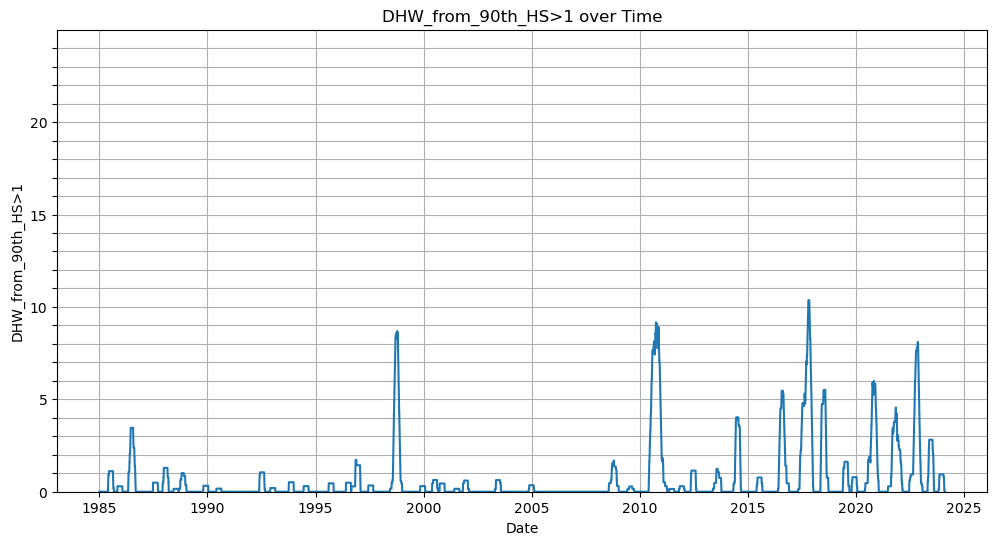

In [121]:
# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot
ax.plot(df['DATE'], df['DHW_from_90th_HS>1'])
ax.set_xlabel('Date')
ax.set_ylabel('DHW_from_90th_HS>1')
ax.set_title('DHW_from_90th_HS>1 over Time')
ax.grid(True)

# # Set y-axis limits
ax.set_yticks(np.arange(0, 25, 1))


# Set y-axis limits with 5 ticks
plt.ylim(0, 25)
for index, label in enumerate(ax.yaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)


plt.show()

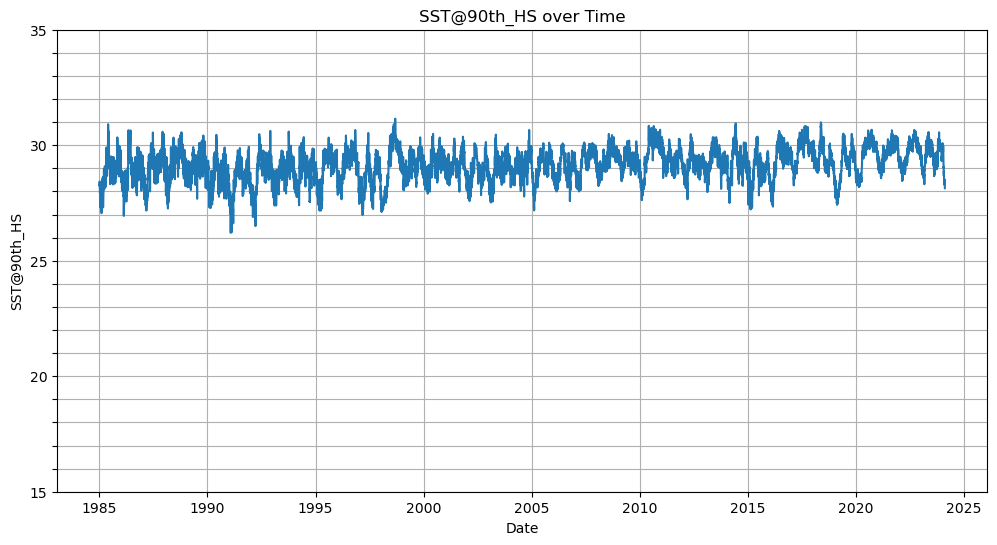

In [129]:
# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot
ax.plot(df['DATE'], df['SST@90th_HS'])
ax.set_xlabel('Date')
ax.set_ylabel('SST@90th_HS')
ax.set_title('SST@90th_HS over Time')
ax.grid(True)

# # Set y-axis limits
ax.set_yticks(np.arange(15, 36, 1))

# Set y-axis limits with 5 ticks
# plt.ylim(15, 35)
for index, label in enumerate(ax.yaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)


plt.show()

In [144]:
import matplotlib.ticker as mticker

In [167]:
def ticker_func(x, pos):
#     print(pos)
    if not x%5:
        return "{:g}".format(x)
    else:
        return ""

In [187]:
monthly_mean

[28.0424,
 27.7264,
 27.8581,
 28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.0823,
 29.1088,
 28.8078]

In [188]:
first_BAA

Timestamp('1985-03-31 00:00:00')

In [ ]:
df['YYYY']

In [199]:
df.tail(1).DATE.item()

Timestamp('2024-02-13 00:00:00')

In [201]:
# Define start and end dates
start_date = first_BAA
end_date = df.tail(1).DATE.item()

# Create a date range from start to end with frequency 'MS' (Month Start)
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Convert date range to a list of timestamps
timestamps_list = date_range.tolist()

In [202]:
len(timestamps_list)

467

In [204]:
timestamps_list[0].month

4

In [207]:
monthly_scattervalues = [monthly_mean[month.month-1] for month in timestamps_list]

In [235]:
temp = df.copy()

In [246]:
df = df[(df["YYYY"] == "2022")|(df["YYYY"] == "2023")]

In [296]:
df = temp.copy()

In [268]:
BAA_dict = {0:"cyan",1:"yellow",2:"orange",3:"red",4:"darkred"}

In [308]:
import matplotlib.patches as mpatches

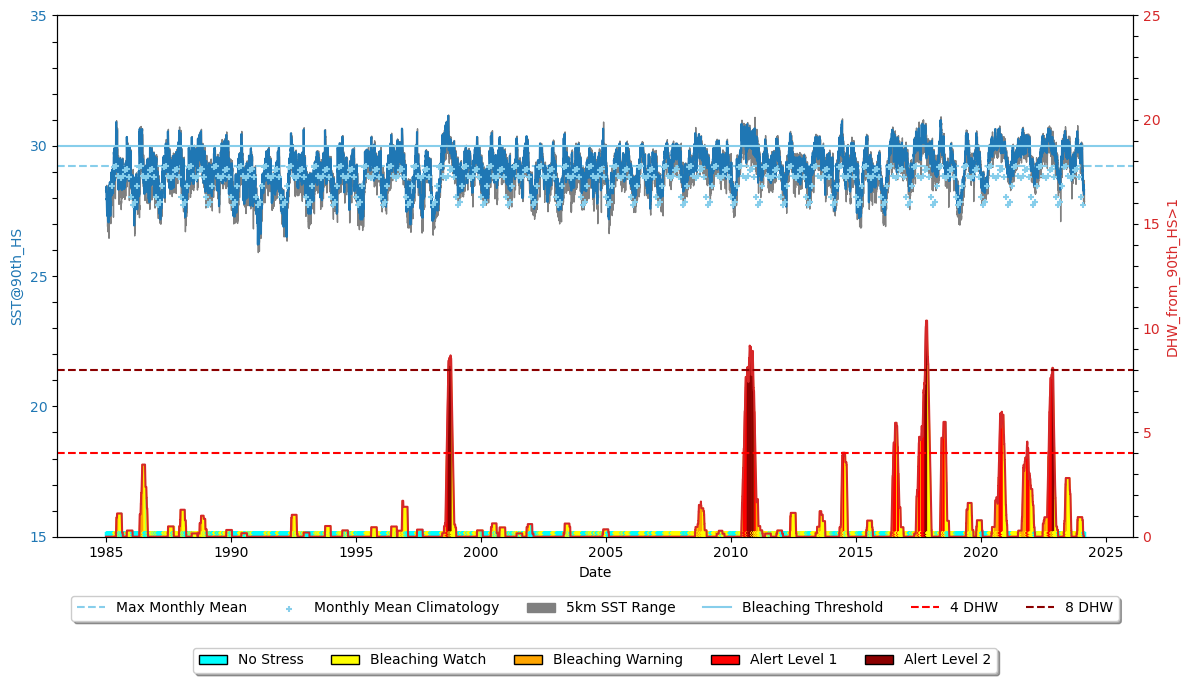

In [318]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot for SST@90th_HS
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('SST@90th_HS', color=color)
line1 =ax1.axhline(y=max_monthly_mean, color='skyblue', linestyle='--', label = 'Max Monthly Mean')

ax1.plot(df['DATE'], df['SST@90th_HS'], color=color)
line2 = ax1.fill_between(x=df['DATE'],y1=df['SST_MIN'],y2=df["SST_MAX"], color = "grey", label = "5km SST Range")

line3 =ax1.axhline(y=30.0, color='skyblue', linestyle='-', label = 'Bleaching Threshold')

scatter1 = ax1.scatter(timestamps_list,monthly_scattervalues,marker = '+', s = 25, color = 'skyblue',label = "Monthly Mean Climatology", zorder=10)

ax1.tick_params(axis='y', labelcolor=color)

# # Set y-axis limits
ax1.set_yticks(range(15, 36, 1))
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(ticker_func))

        

# Create a second y-axis for DHW@90th_HS
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('DHW_from_90th_HS>1', color=color)
ax2.plot(df['DATE'], df['DHW_from_90th_HS>1'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks(np.arange(0, 26, 1))

# Set y-axis limits with 5 ticks
ax2.set_ylim(0, 25)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(ticker_func))

line4 =ax2.axhline(y=4, color='red', linestyle='--', label = '4 DHW')
line5 =ax2.axhline(y=8, color='darkred', linestyle='--', label = '8 DHW')


ax2.fill_between(df["DATE"],df['DHW_from_90th_HS>1'], where = df["BAA_7day_max"] == 0, color='cyan')
ax2.fill_between(df["DATE"],df['DHW_from_90th_HS>1'], where = df["BAA_7day_max"] == 1, color='yellow')
ax2.fill_between(df["DATE"],df['DHW_from_90th_HS>1'], where = df["BAA_7day_max"] == 2, color='orange')
ax2.fill_between(df["DATE"],df['DHW_from_90th_HS>1'], where = df["BAA_7day_max"] == 3, color='red')
ax2.fill_between(df["DATE"],df['DHW_from_90th_HS>1'], where = df["BAA_7day_max"] == 4, color='darkred')

c = [BAA_dict[x] for x in df["BAA_7day_max"]]

#This changes the thickness of the BAA label on the bottom, 5 is a good max for biyearly, and for the entire
#record you may want a smaller range max like 3
for i in range(0,3):
    ax2.scatter(x= df["DATE"], y= [i/10]*len(df["DATE"]), c=c, cmap=cmap,marker ="s", s =1)

fig.tight_layout()  # Adjust layout to prevent overlapping labels

alert1 = mpatches.Patch(facecolor='cyan',edgecolor="black", label='No Stress')
alert2 = mpatches.Patch(facecolor='yellow',edgecolor="black", label='Bleaching Watch')
alert3 = mpatches.Patch(facecolor='orange',edgecolor="black", label='Bleaching Warning')
alert4 = mpatches.Patch(facecolor='red',edgecolor="black", label='Alert Level 1')
alert5 = mpatches.Patch(facecolor='darkred',edgecolor="black", label='Alert Level 2')


# red_patch = mpatches.Patch(color='red', label='The red data')
# red_patch = mpatches.Patch(color='red', label='The red data')
# red_patch = mpatches.Patch(color='red', label='The red data')

ax2.legend(handles = [alert1,alert2,alert3,alert4,alert5], loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


lines = [line1,scatter1,line2,line3, line4,line5]
# lines = [line1,line2,line3, line4,line5]
labels = [line.get_label() for line in lines]
# plt.legend(lines, labels)


ax1.legend(lines , labels, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=6)

# plt.legend()
plt.show()

In [323]:
df

YYYY  MM  DD  SST_MIN  SST_MAX  SST@90th_HS SSTA@90th_HS 90th_HS>0  \
0      1985  01  01    28.12    28.32        28.26      -0.2252    0.0000   
1      1985  01  02    28.03    28.29        28.24      -0.2561    0.0000   
2      1985  01  03    28.18    28.42        28.36      -0.1171    0.0000   
3      1985  01  04    28.27    28.50        28.43      -0.0190    0.0000   
4      1985  01  05    28.16    28.40        28.37      -0.0619    0.0000   
...     ...  ..  ..      ...      ...          ...          ...       ...   
14283  2024  02  09    27.90    28.41        28.33       0.6223    0.0000   
14284  2024  02  10    28.01    28.39        28.30       0.4019    0.0000   
14285  2024  02  11    27.79    28.32        28.23       0.3461    0.0000   
14286  2024  02  12    27.89    28.33        28.19       0.3171    0.0000   
14287  2024  02  13    27.86    28.35        28.14       0.2668    0.0000   

       DHW_from_90th_HS>1  BAA_7day_max       DATE  
0                     0.0             0 1985-01-01  
1                     0.0             0 1985-01-02  
2                     0.0             0 1985-01-03  
3                     0.0             0 1985-01-04  
4                     0.0             0 1985-01-05  
...                   ...           ...        ...  
14283                 0.0             0 2024-02-09  
14284                 0.0             0 2024-02-10  
14285                 0.0             0 2024-02-11  
14286                 0.0             0 2024-02-12  
14287                 0.0             0 2024-02-13  

[14288 rows x 11 columns]

In [335]:
biyearly

YYYY  MM  DD  SST_MIN  SST_MAX  SST@90th_HS SSTA@90th_HS 90th_HS>0  \
0    1985  01  01    28.12    28.32        28.26      -0.2252    0.0000   
1    1985  01  02    28.03    28.29        28.24      -0.2561    0.0000   
2    1985  01  03    28.18    28.42        28.36      -0.1171    0.0000   
3    1985  01  04    28.27    28.50        28.43      -0.0190    0.0000   
4    1985  01  05    28.16    28.40        28.37      -0.0619    0.0000   
..    ...  ..  ..      ...      ...          ...          ...       ...   
725  1986  12  27    28.51    28.85        28.81       0.2258    0.0000   
726  1986  12  28    28.41    29.00        28.91       0.3671    0.0000   
727  1986  12  29    28.19    28.68        28.57      -0.0558    0.0000   
728  1986  12  30    28.41    29.00        28.90       0.4074    0.0000   
729  1986  12  31    28.62    29.19        29.09       0.5323    0.0000   

     DHW_from_90th_HS>1  BAA_7day_max       DATE  
0                   0.0             0 1985-01-01  
1                   0.0             0 1985-01-02  
2                   0.0             0 1985-01-03  
3                   0.0             0 1985-01-04  
4                   0.0             0 1985-01-05  
..                  ...           ...        ...  
725                 0.0             1 1986-12-27  
726                 0.0             1 1986-12-28  
727                 0.0             1 1986-12-29  
728                 0.0             0 1986-12-30  
729                 0.0             0 1986-12-31  

[730 rows x 11 columns]

In [337]:
monthly_scattervalues

[28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.0823,
 29.1088,
 28.8078,
 28.0424,
 27.7264,
 27.8581,
 28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.0823,
 29.1088,
 28.8078,
 28.0424,
 27.7264,
 27.8581,
 28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.0823,
 29.1088,
 28.8078,
 28.0424,
 27.7264,
 27.8581,
 28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.0823,
 29.1088,
 28.8078,
 28.0424,
 27.7264,
 27.8581,
 28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.0823,
 29.1088,
 28.8078,
 28.0424,
 27.7264,
 27.8581,
 28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.0823,
 29.1088,
 28.8078,
 28.0424,
 27.7264,
 27.8581,
 28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.0823,
 29.1088,
 28.8078,
 28.0424,
 27.7264,
 27.8581,
 28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.0823,
 29.1088,
 28.8078,
 28.0424,
 27.7264,
 27.8581,
 28.4679,
 29.178,
 29.2309,
 28.855,
 28.781,
 28.8377,
 29.082

In [346]:
monthly_scatter_dict = dict(zip(timestamps_list, monthly_scattervalues))

In [370]:
monthly_scatter_df = pd.DataFrame(monthly_scattervalues, index = timestamps_list)
monthly_scatter_df.reset_index(inplace = True)
monthly_scatter_df['sst'] = monthly_scatter_df[0]
monthly_scatter_df['time'] = monthly_scatter_df['index']
monthly_scatter_df = monthly_scatter_df[['time','sst']]

In [377]:
monthly_scatter_df[(monthly_scatter_df['time'] > np.datetime64('2021-12-31 00:00:00'))& (monthly_scatter_df['time'] < np.datetime64('2024-01-01 00:00:00'))]

time      sst
441 2022-01-01  28.0424
442 2022-02-01  27.7264
443 2022-03-01  27.8581
444 2022-04-01  28.4679
445 2022-05-01  29.1780
446 2022-06-01  29.2309
447 2022-07-01  28.8550
448 2022-08-01  28.7810
449 2022-09-01  28.8377
450 2022-10-01  29.0823
451 2022-11-01  29.1088
452 2022-12-01  28.8078
453 2023-01-01  28.0424
454 2023-02-01  27.7264
455 2023-03-01  27.8581
456 2023-04-01  28.4679
457 2023-05-01  29.1780
458 2023-06-01  29.2309
459 2023-07-01  28.8550
460 2023-08-01  28.7810
461 2023-09-01  28.8377
462 2023-10-01  29.0823
463 2023-11-01  29.1088
464 2023-12-01  28.8078

In [380]:
monthly_scatter_df

time      sst
0   1985-04-01  28.4679
1   1985-05-01  29.1780
2   1985-06-01  29.2309
3   1985-07-01  28.8550
4   1985-08-01  28.7810
..         ...      ...
462 2023-10-01  29.0823
463 2023-11-01  29.1088
464 2023-12-01  28.8078
465 2024-01-01  28.0424
466 2024-02-01  27.7264

[467 rows x 2 columns]

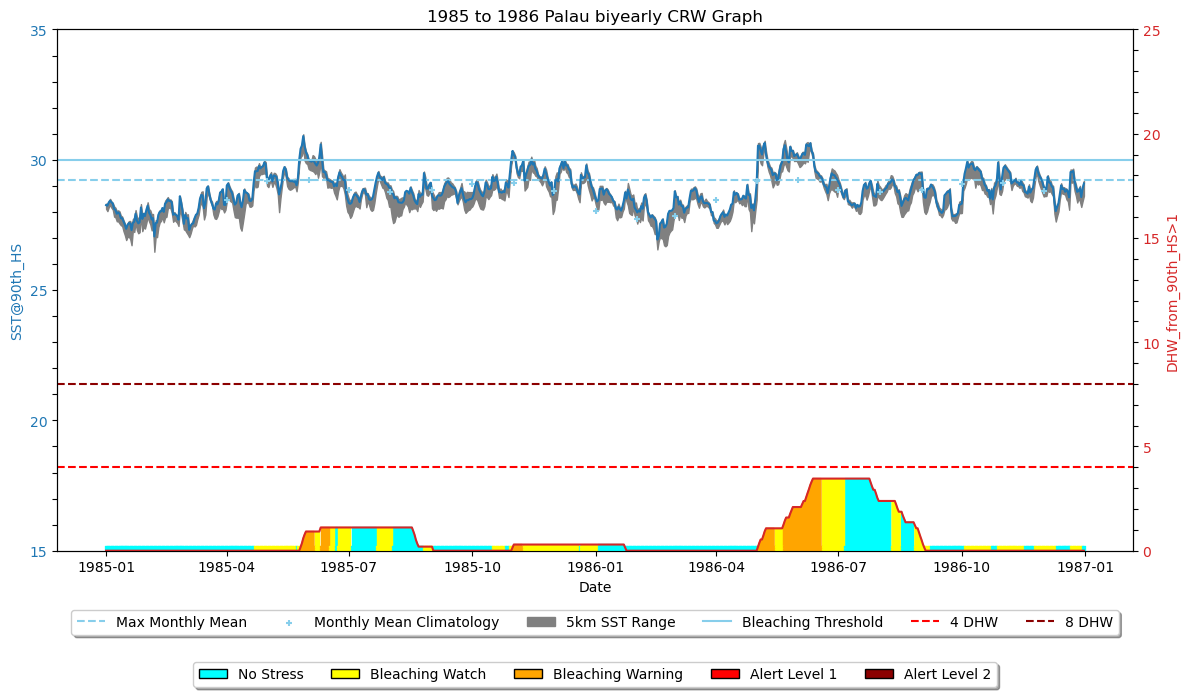

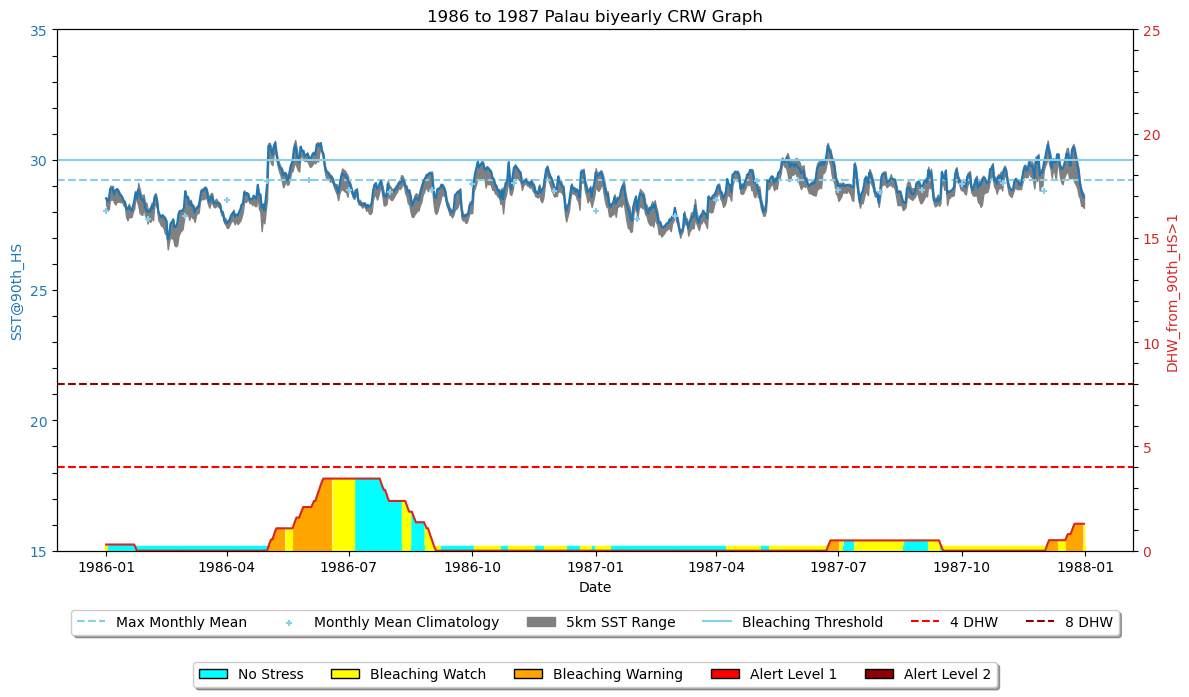

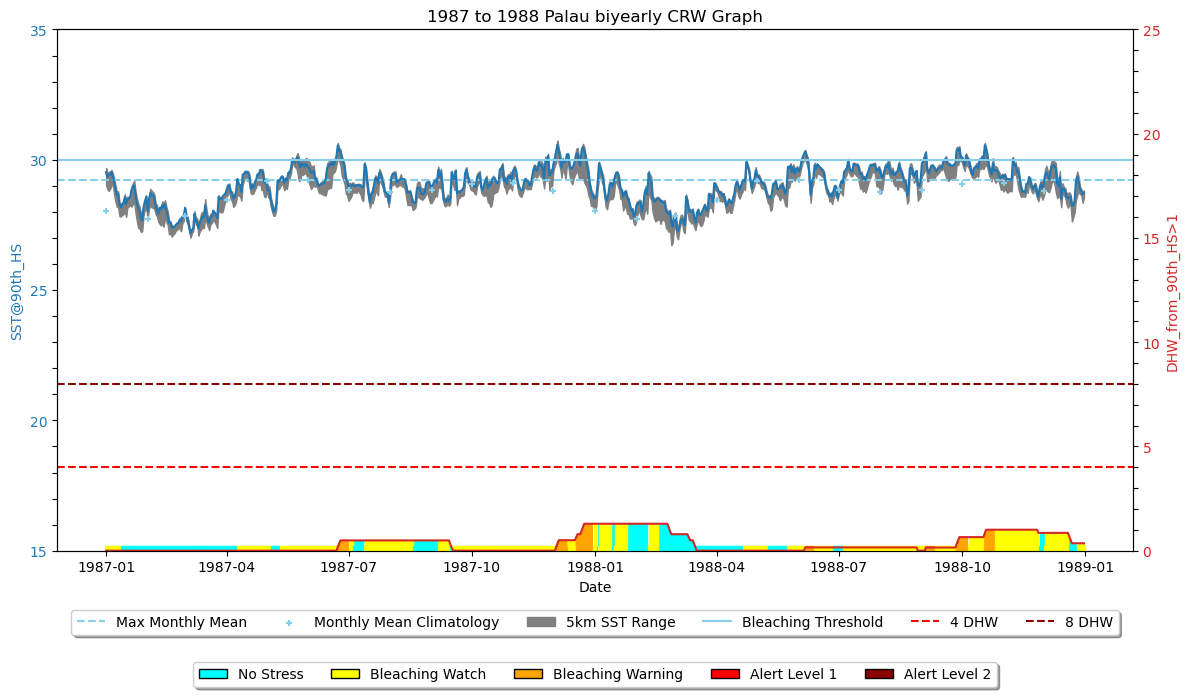

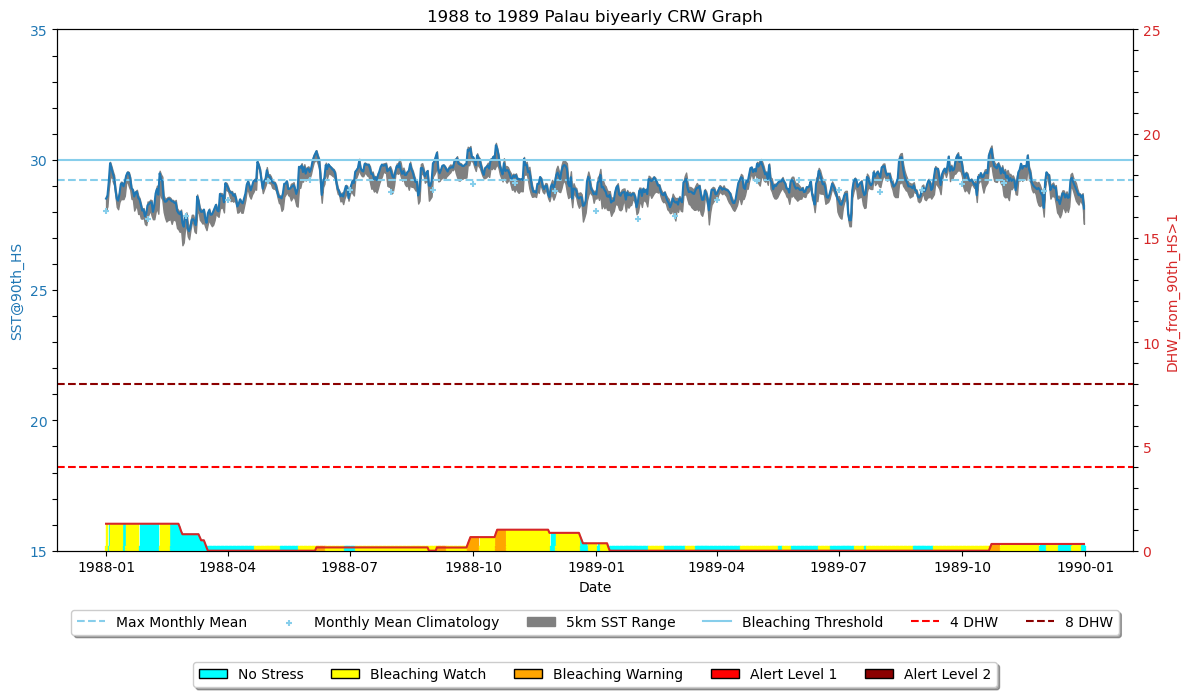

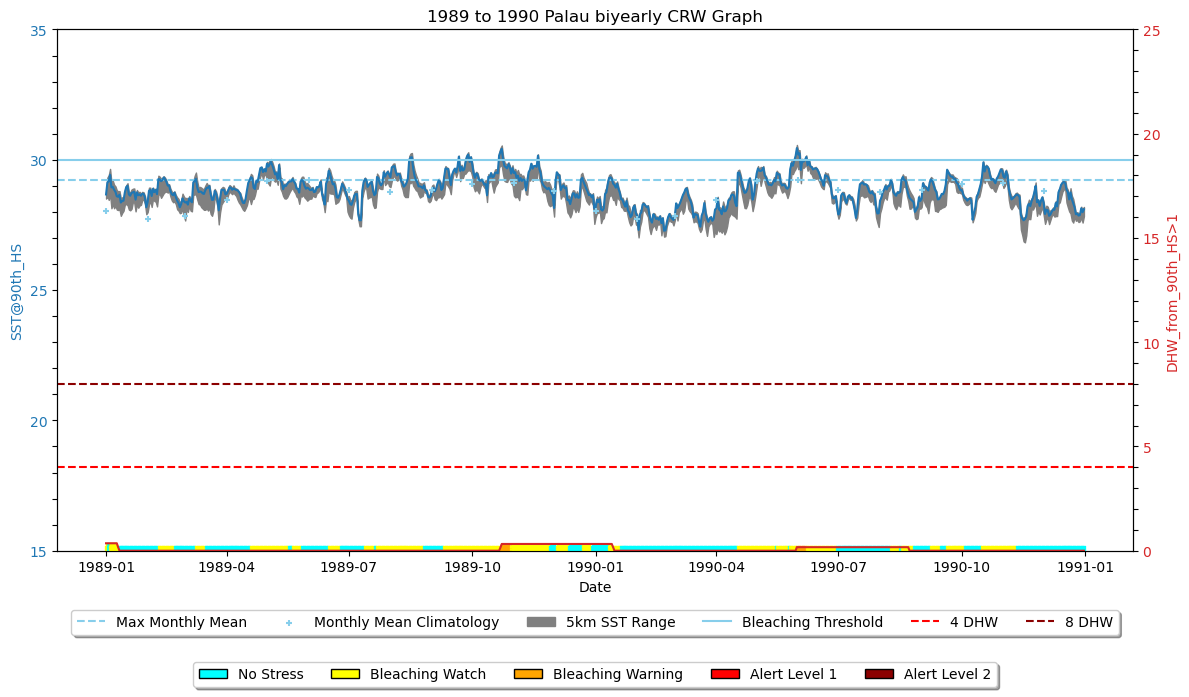

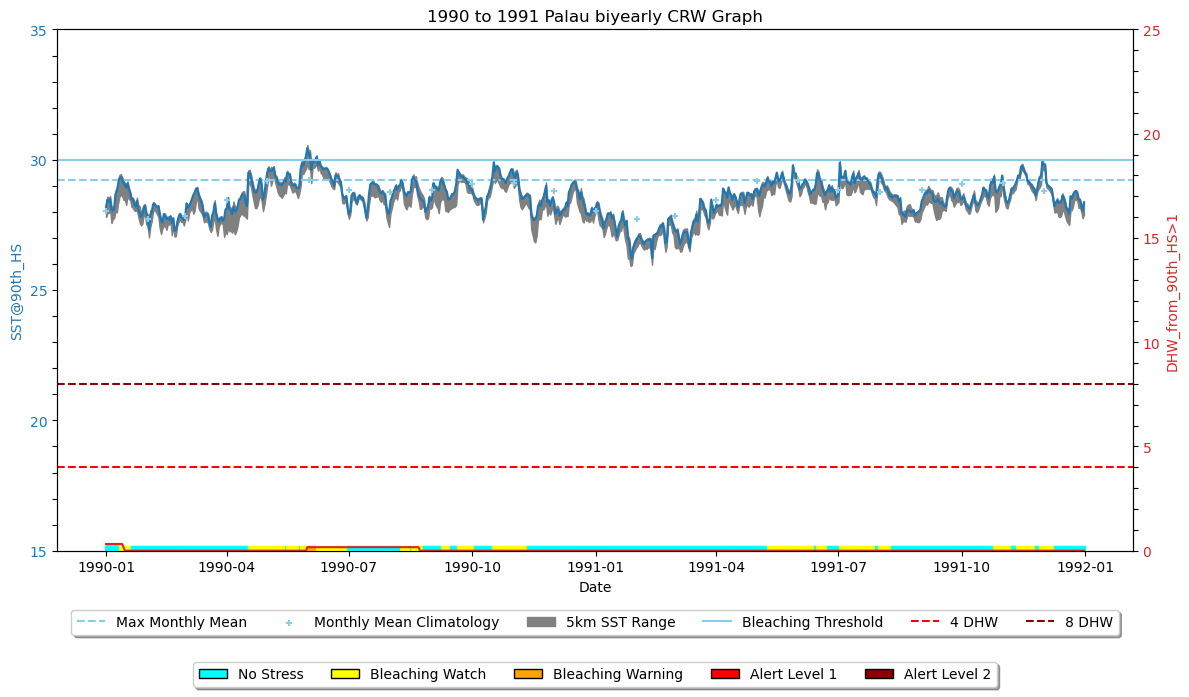

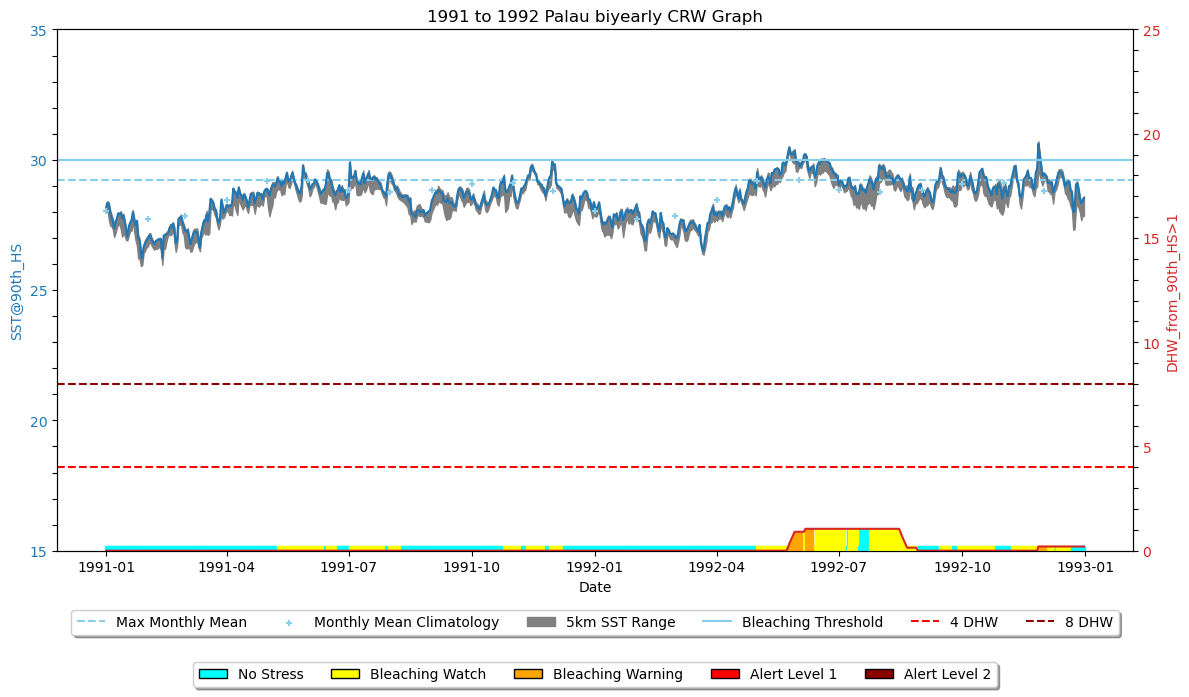

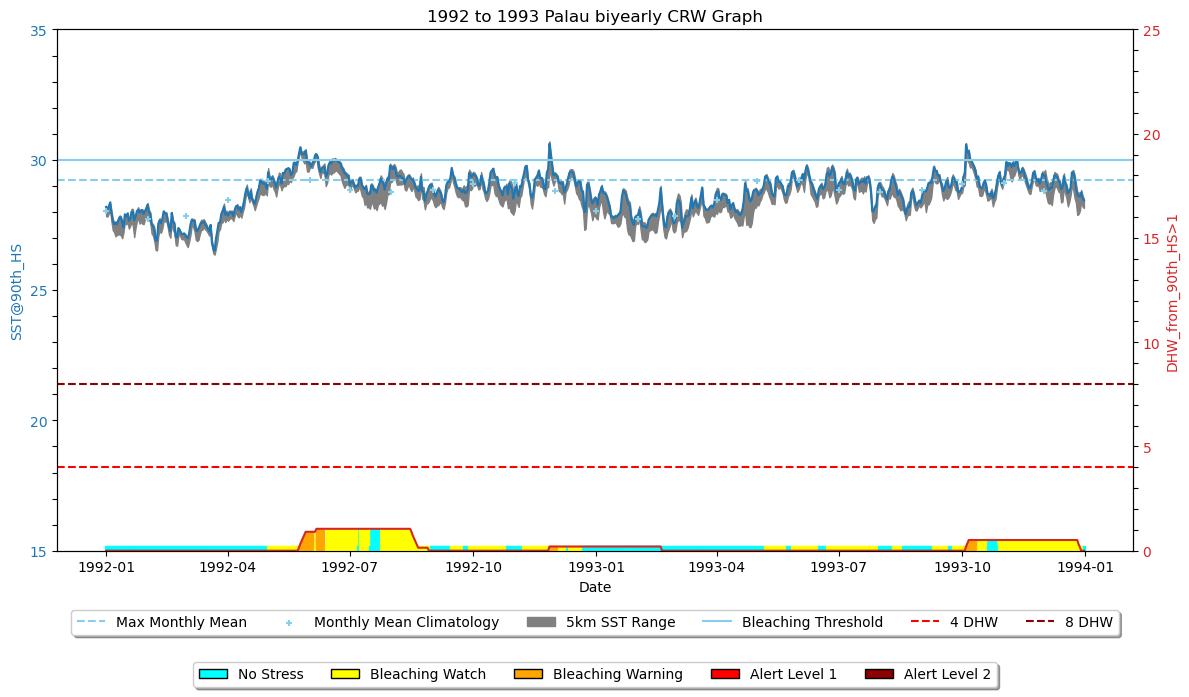

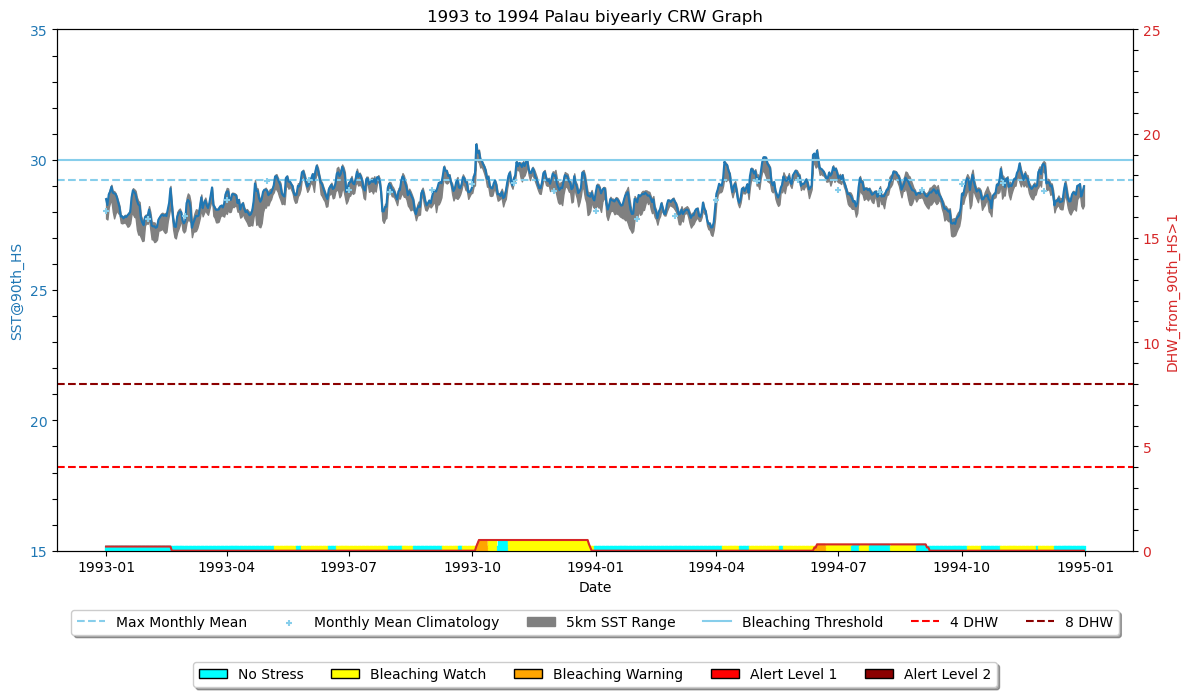

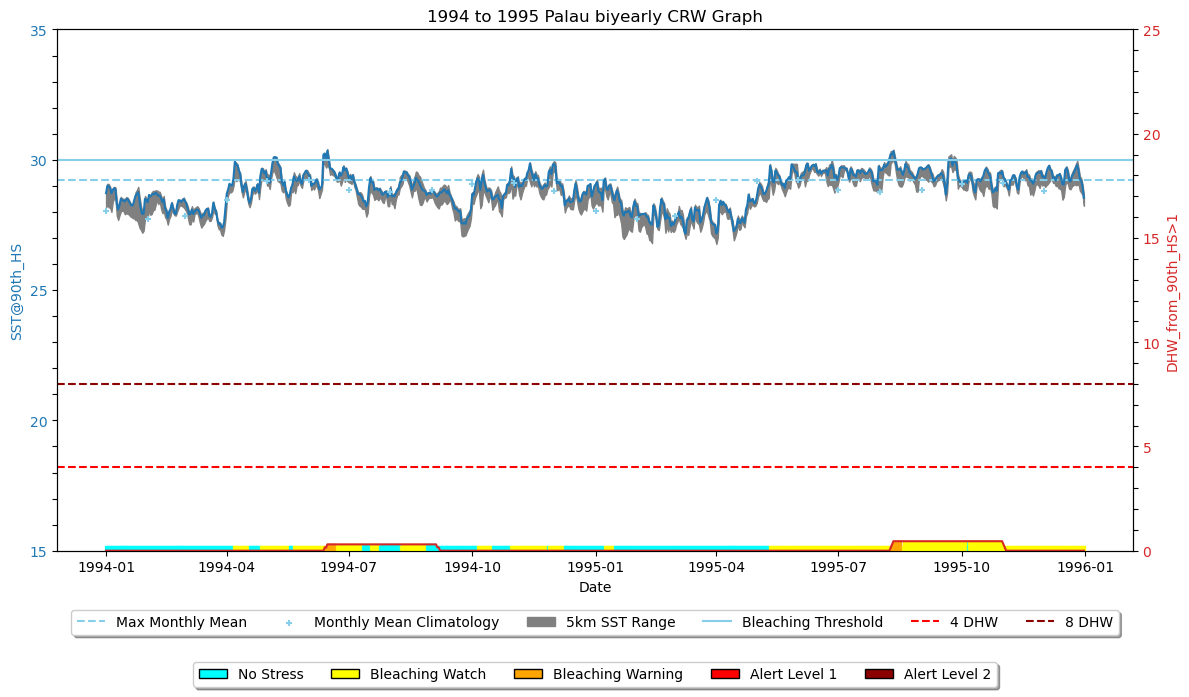

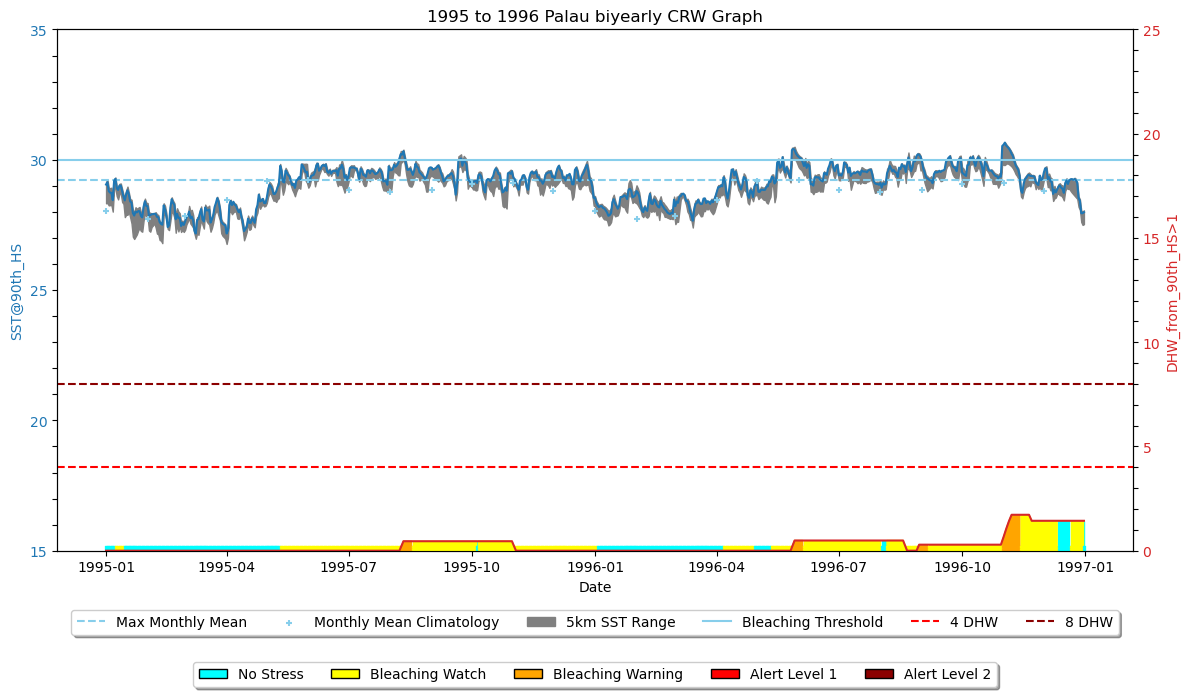

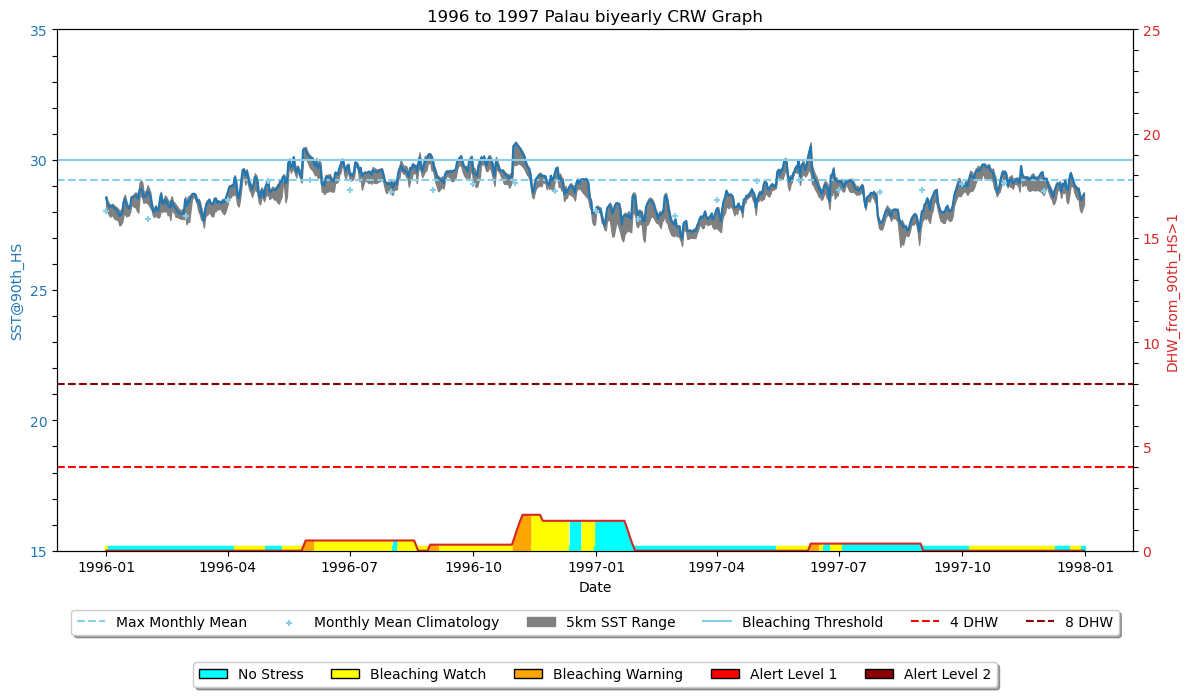

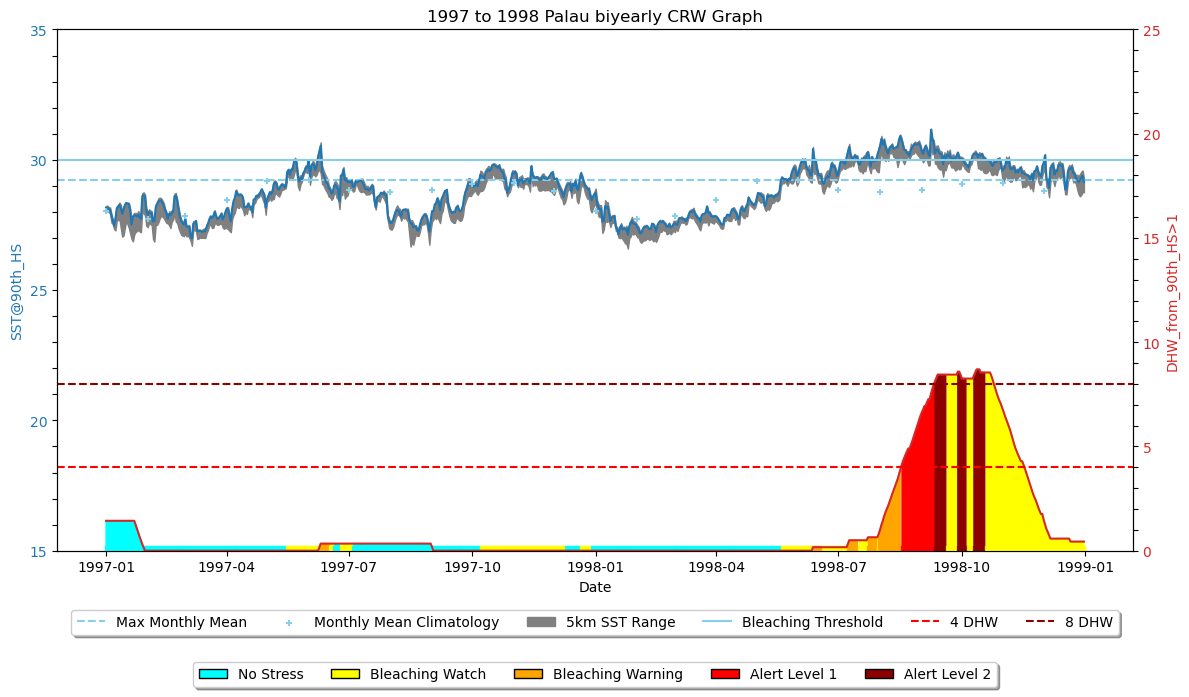

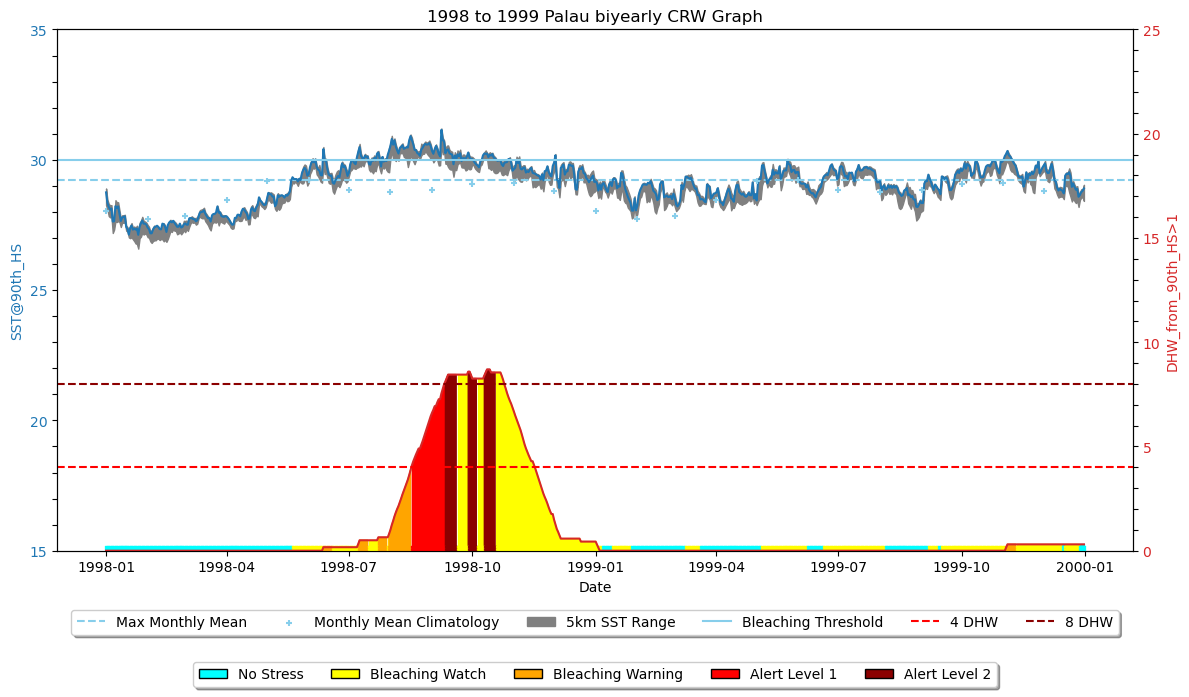

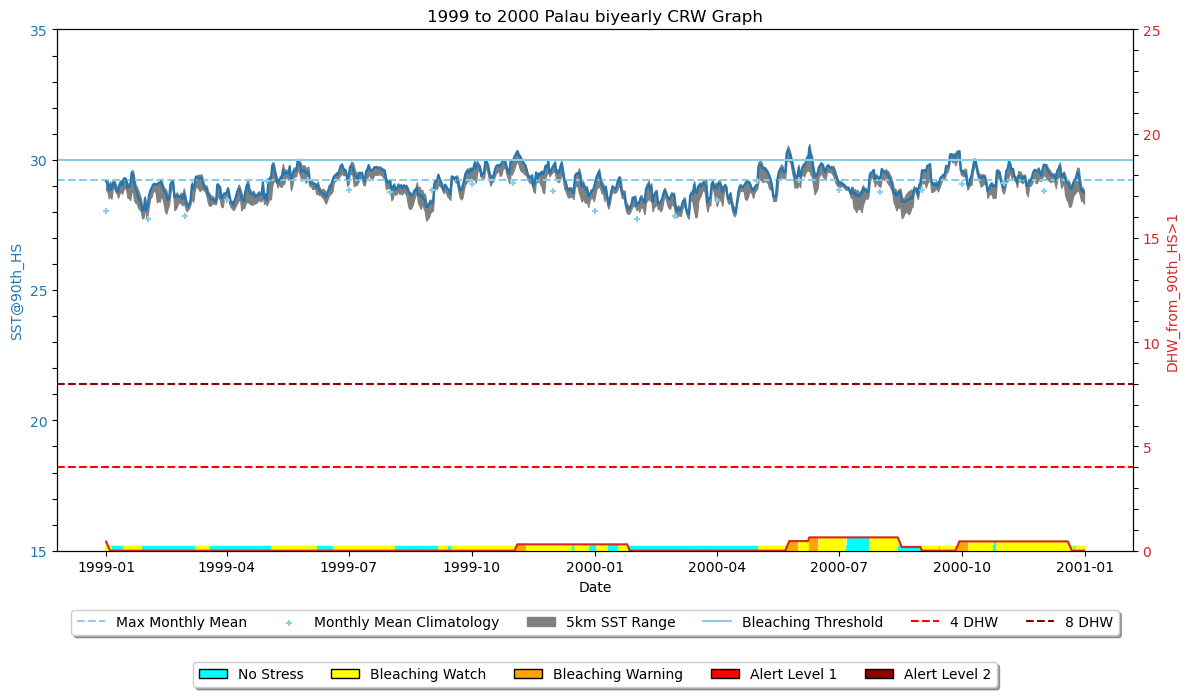

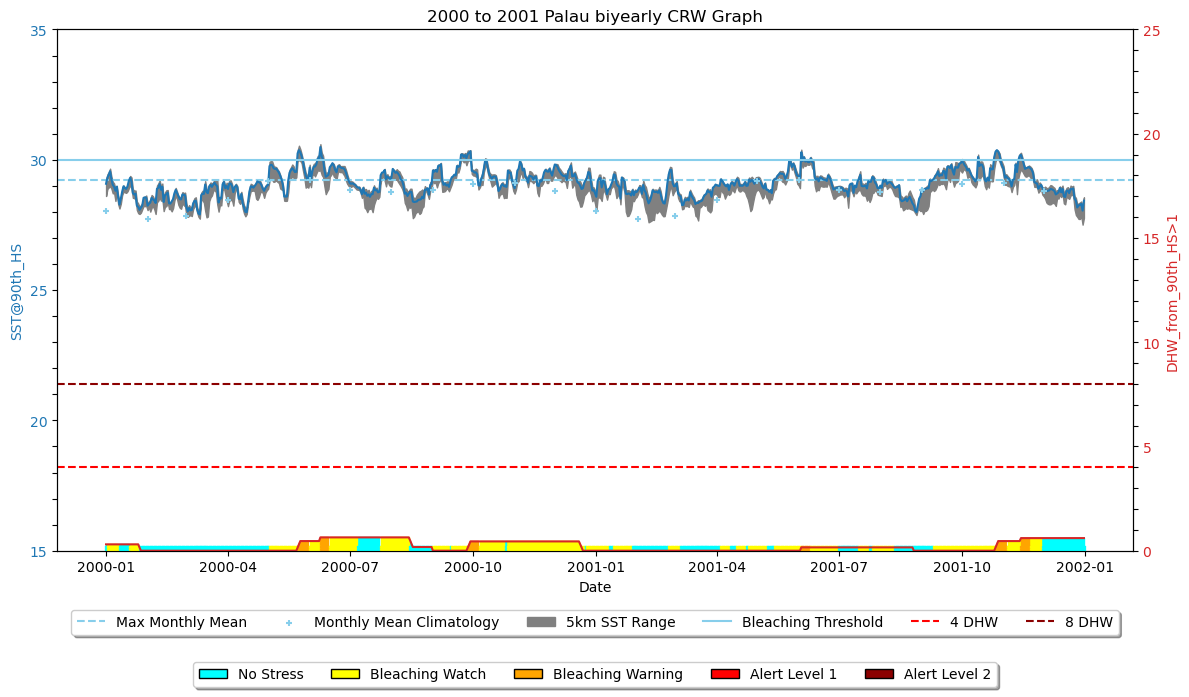

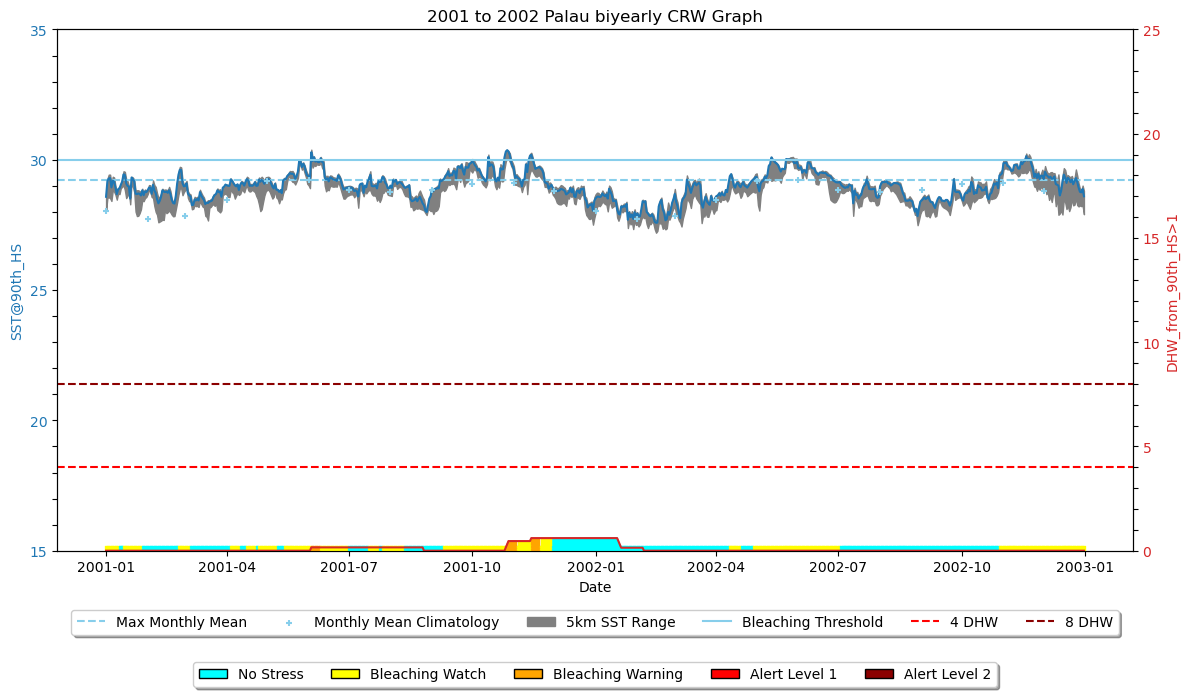

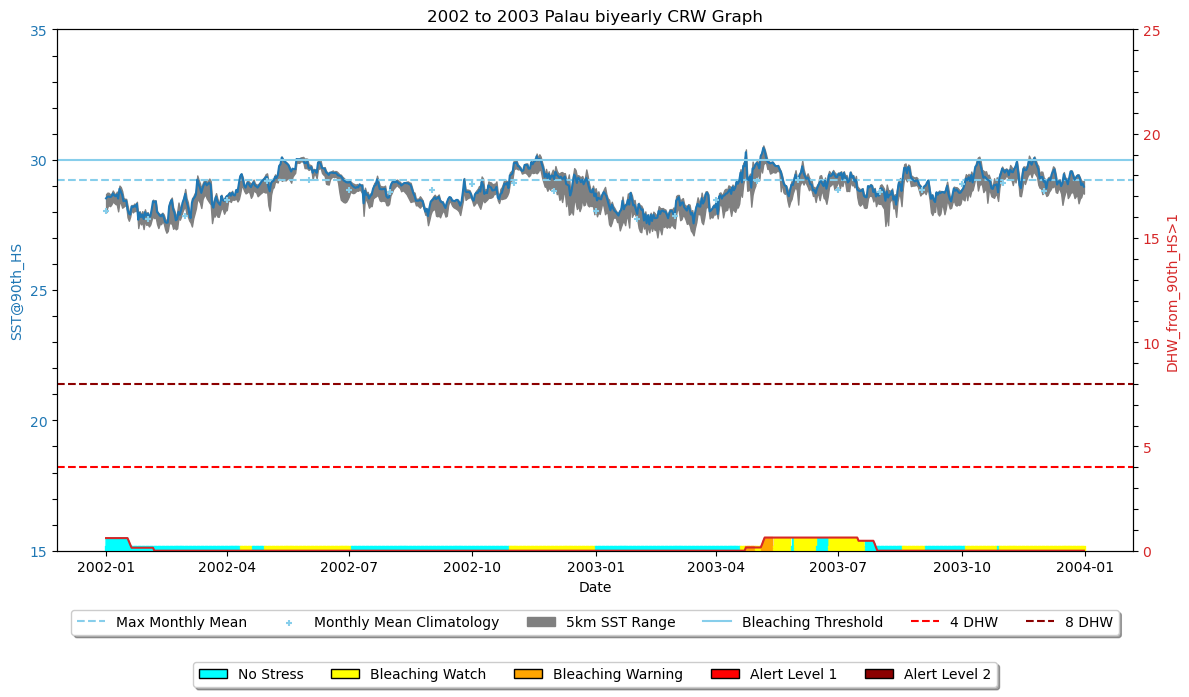

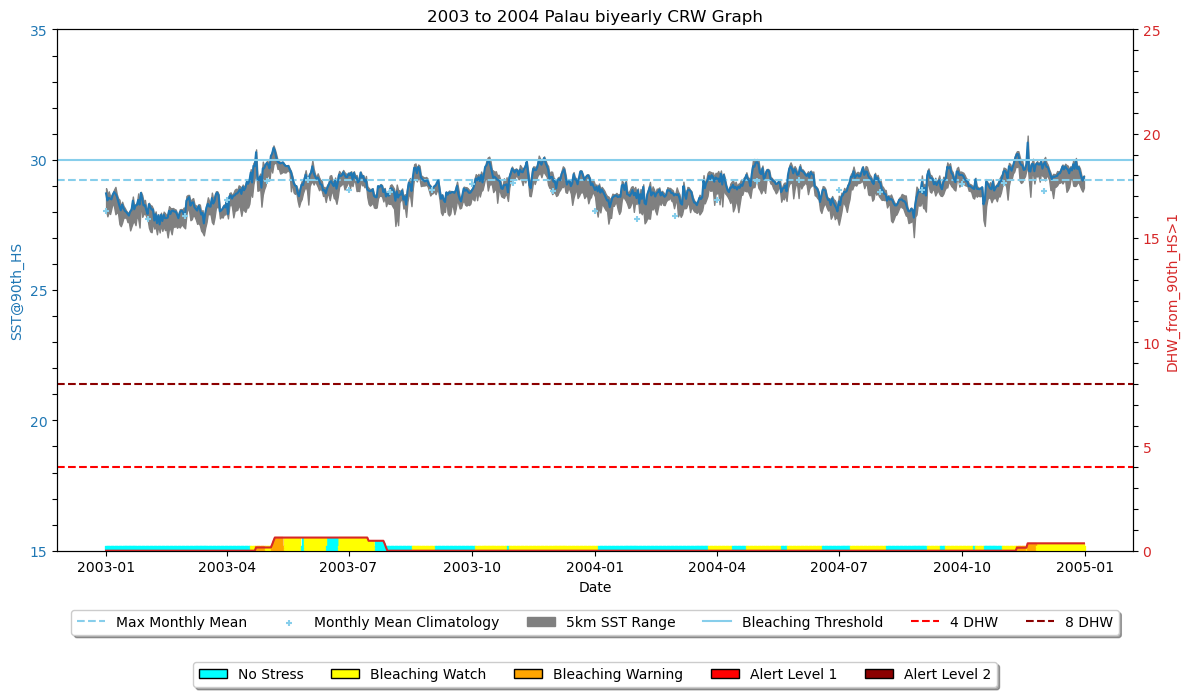

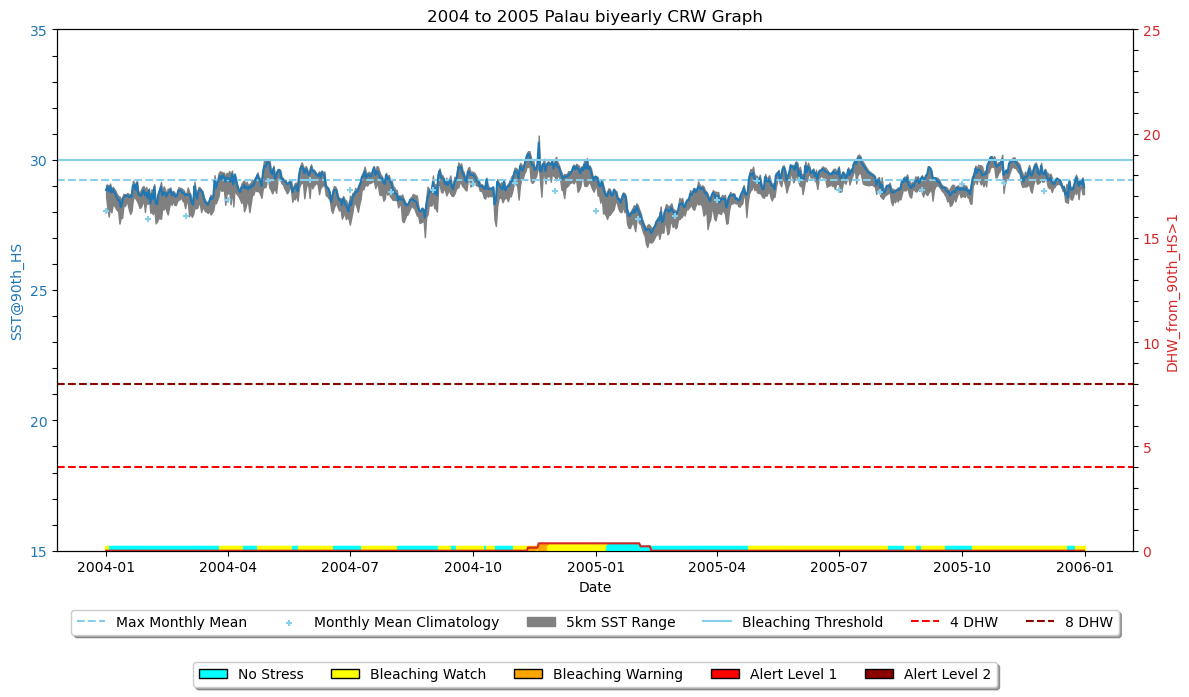

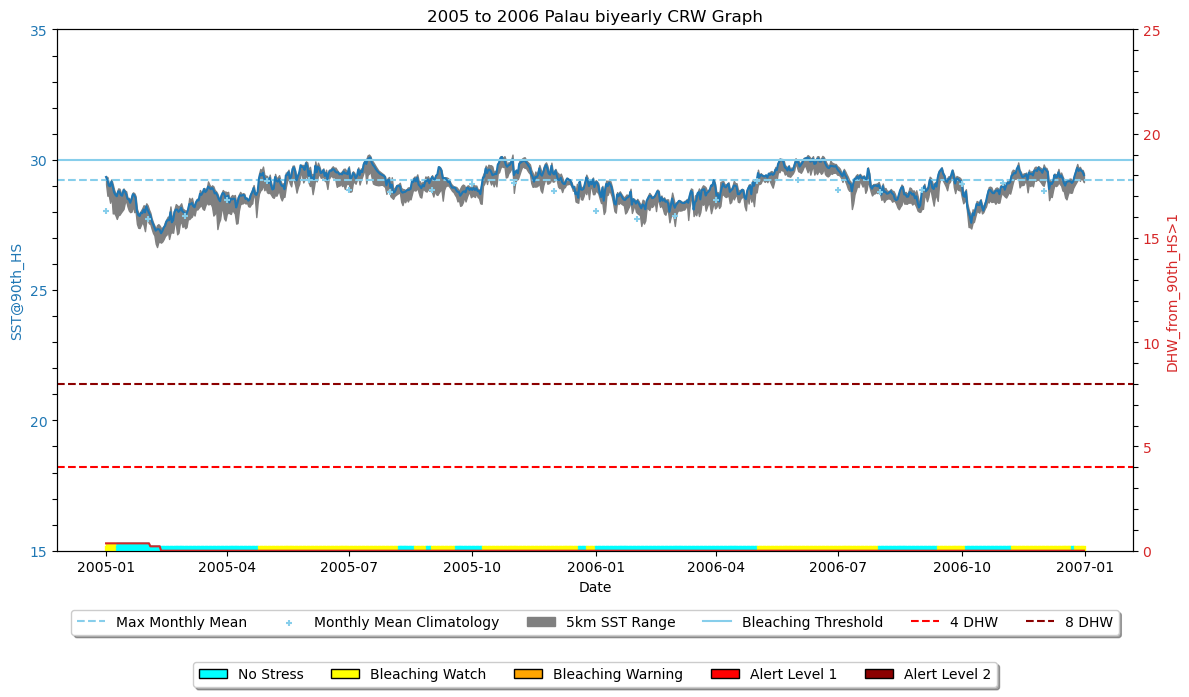

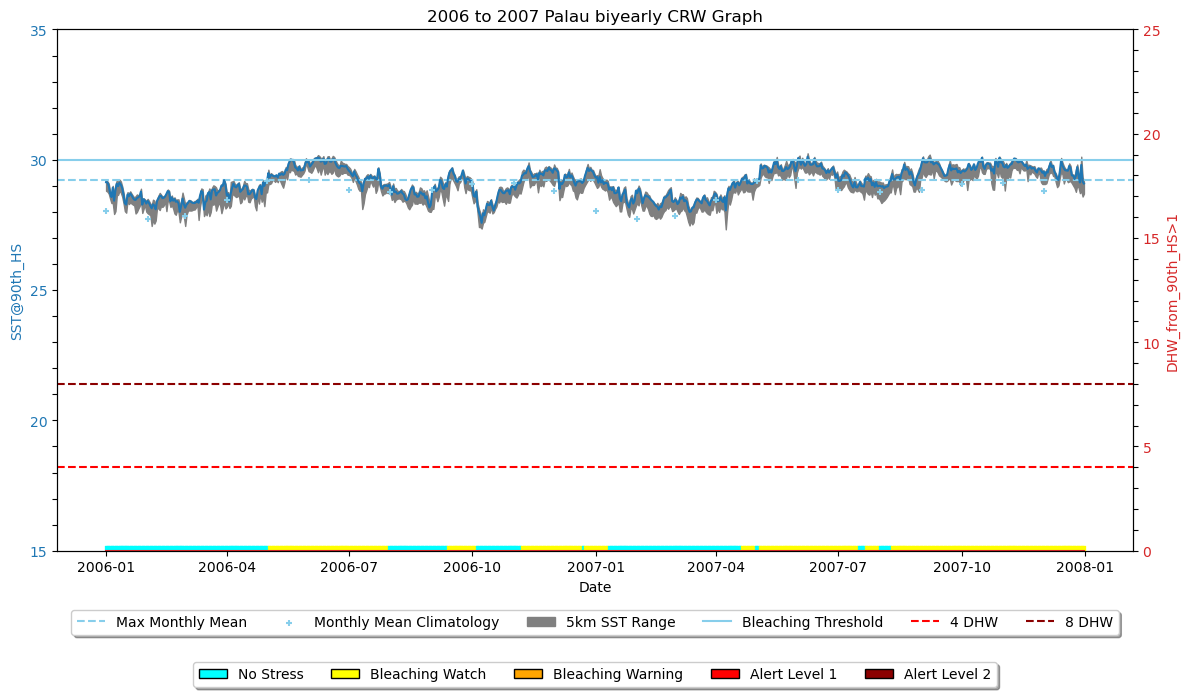

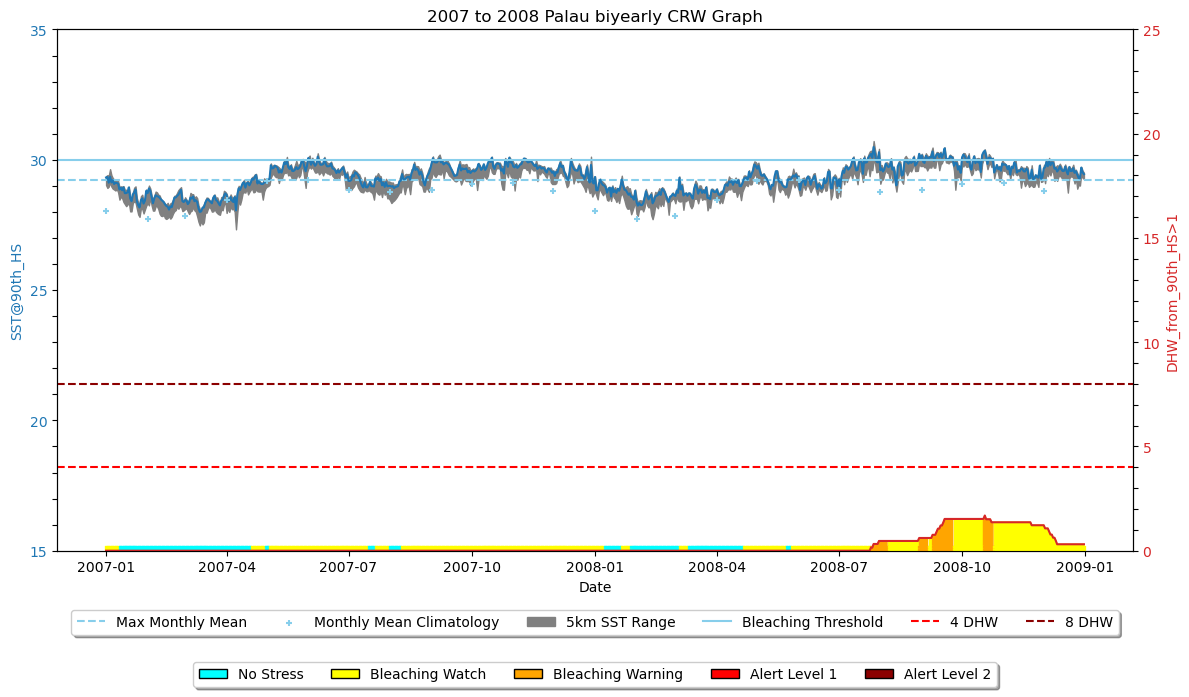

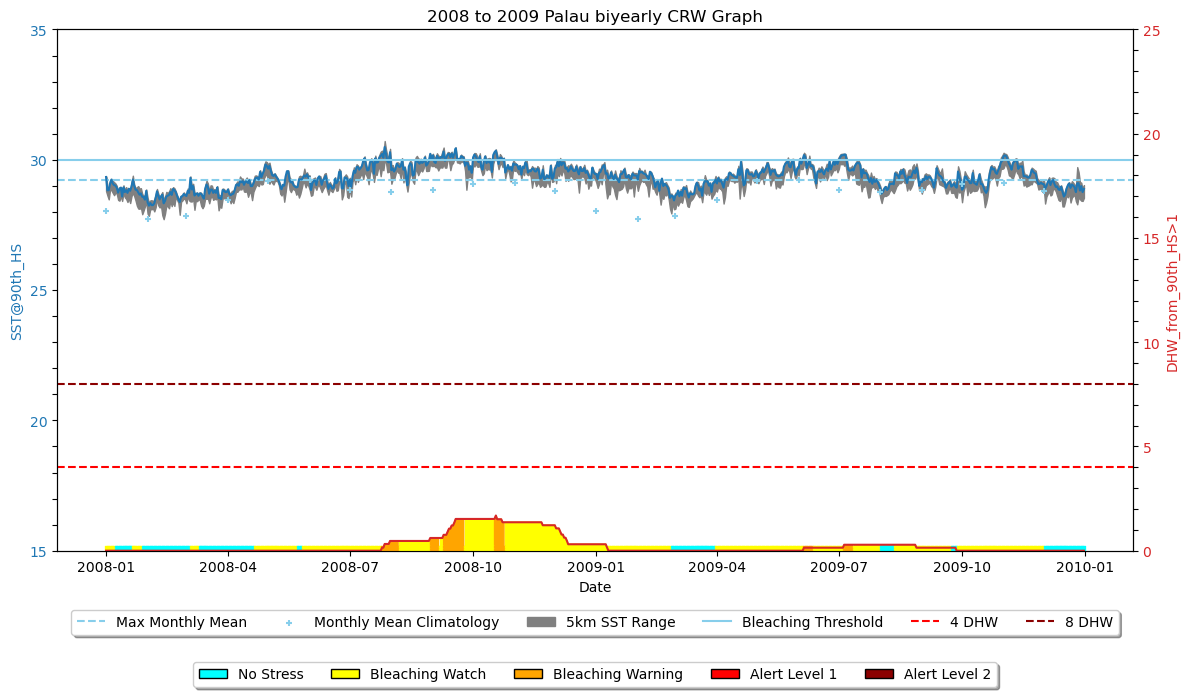

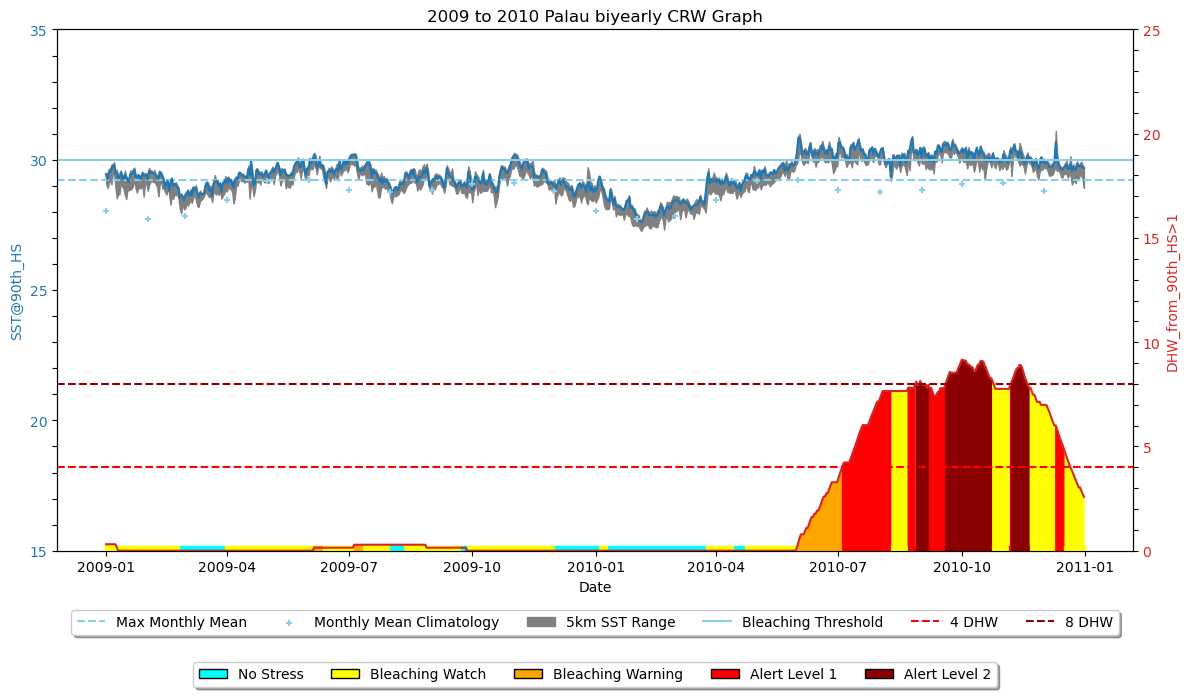

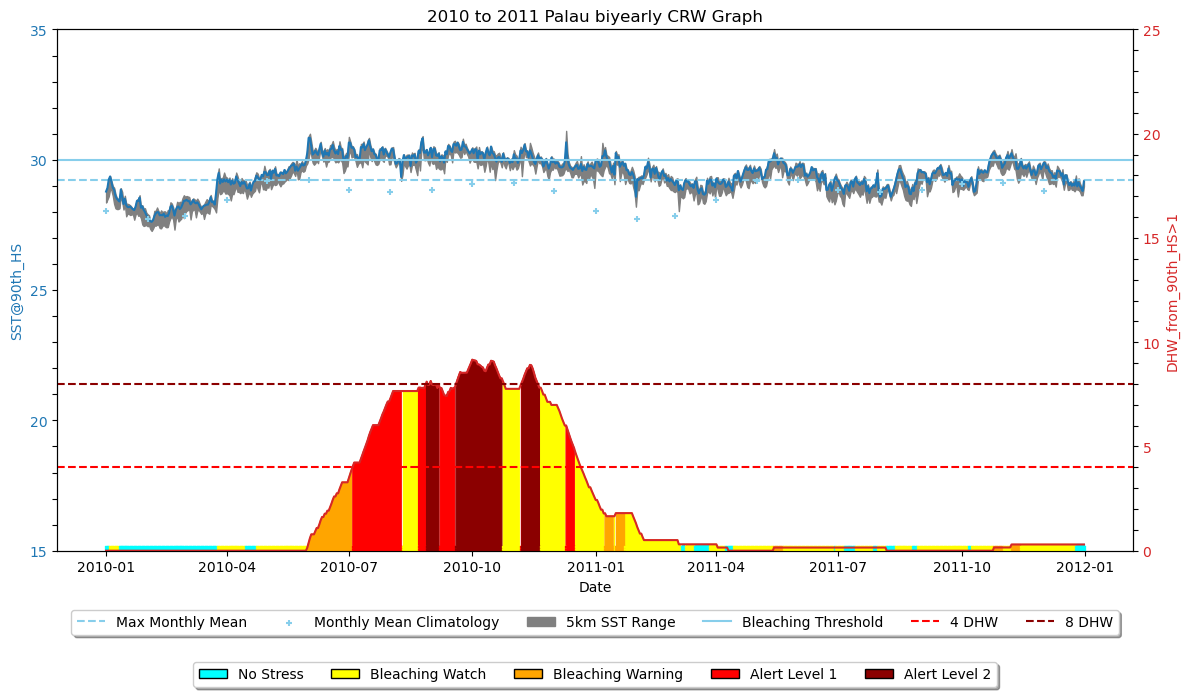

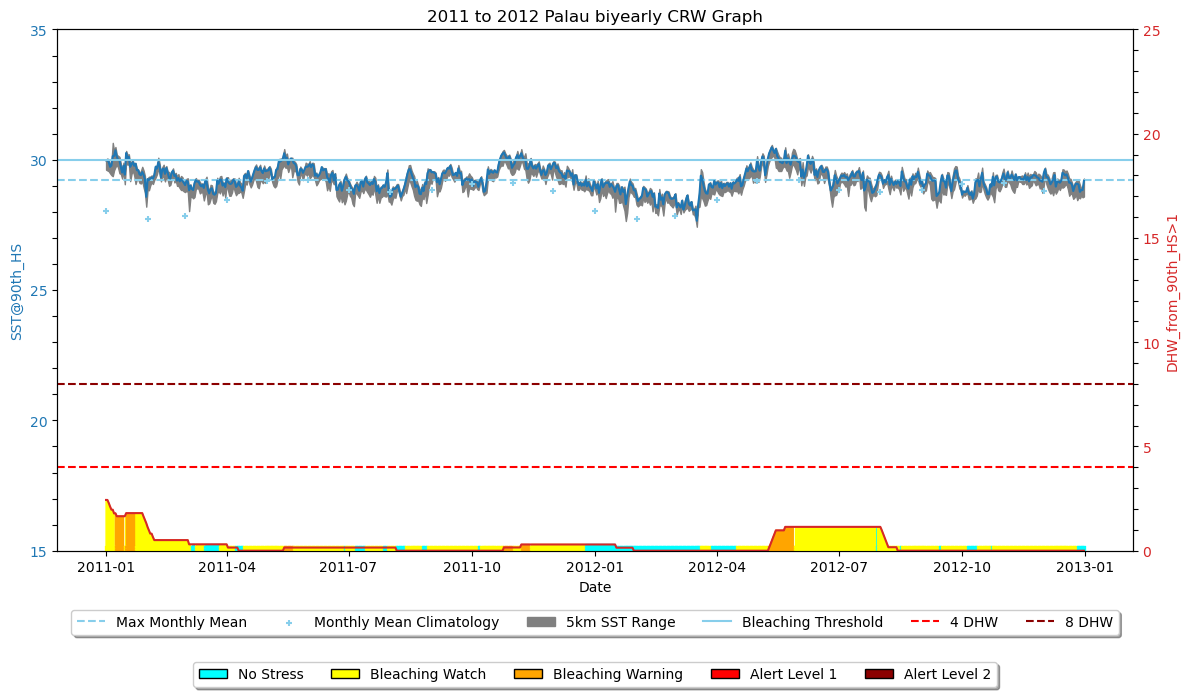

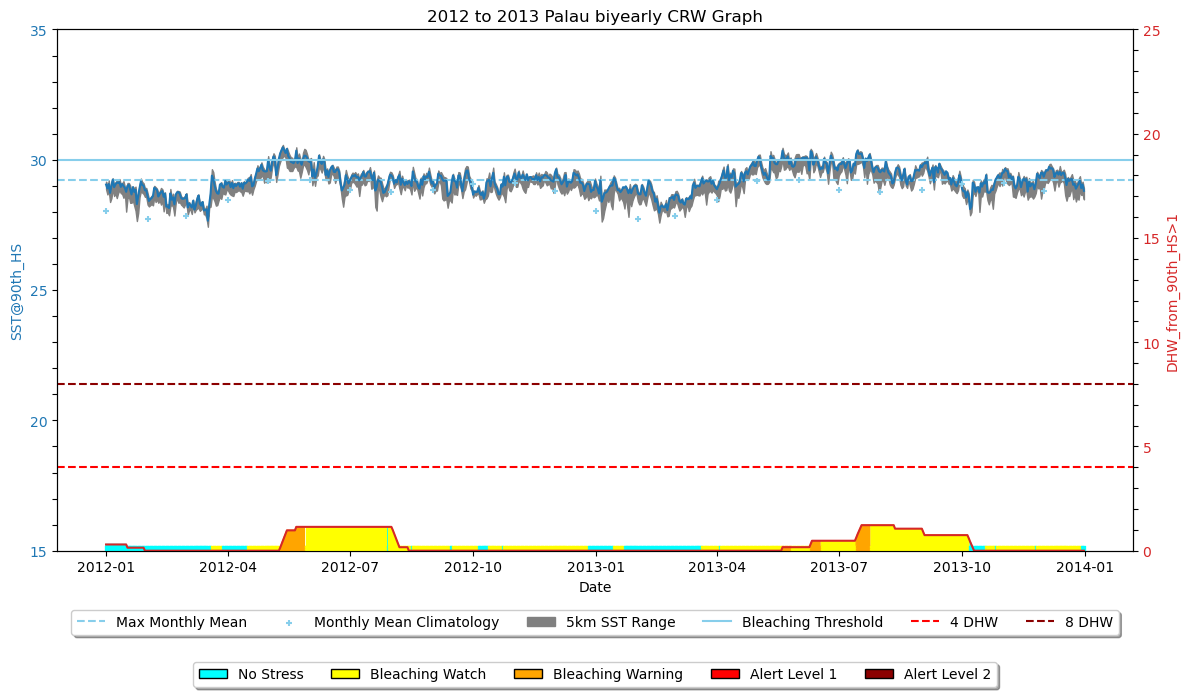

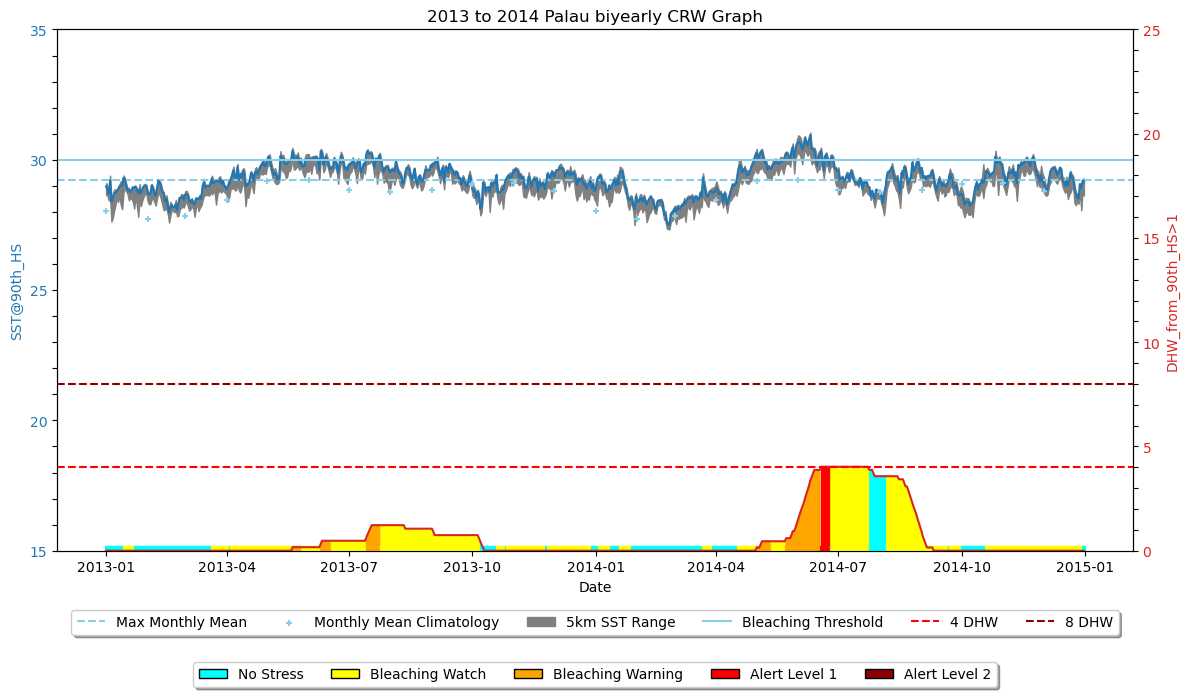

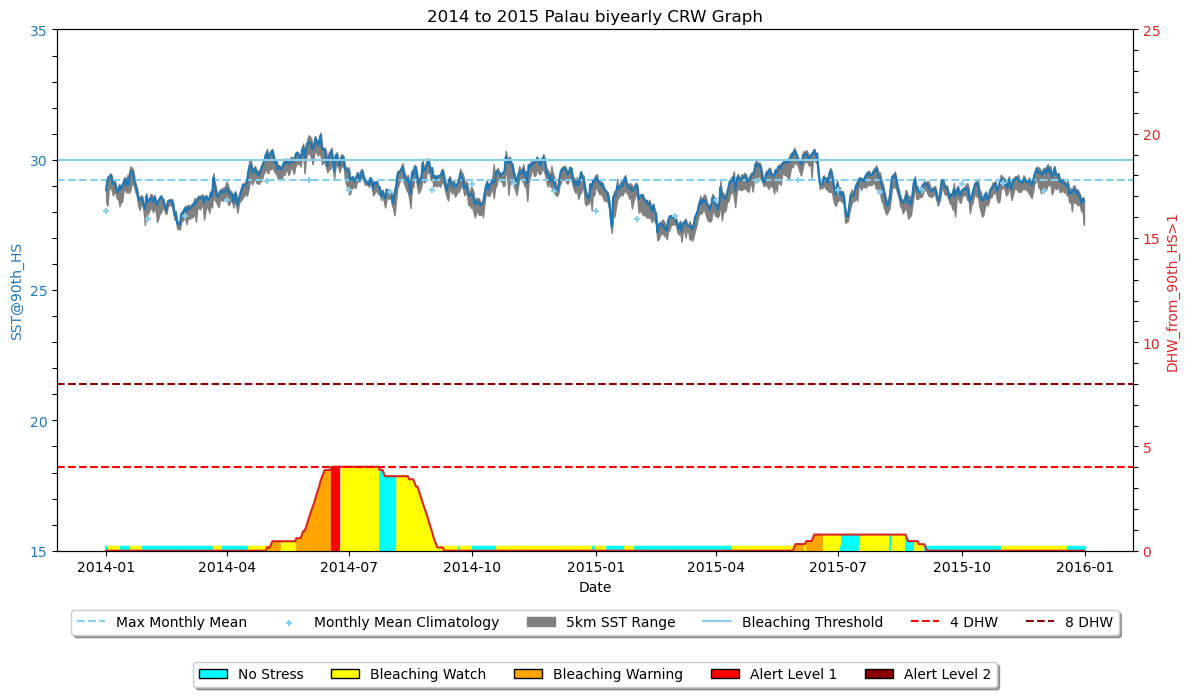

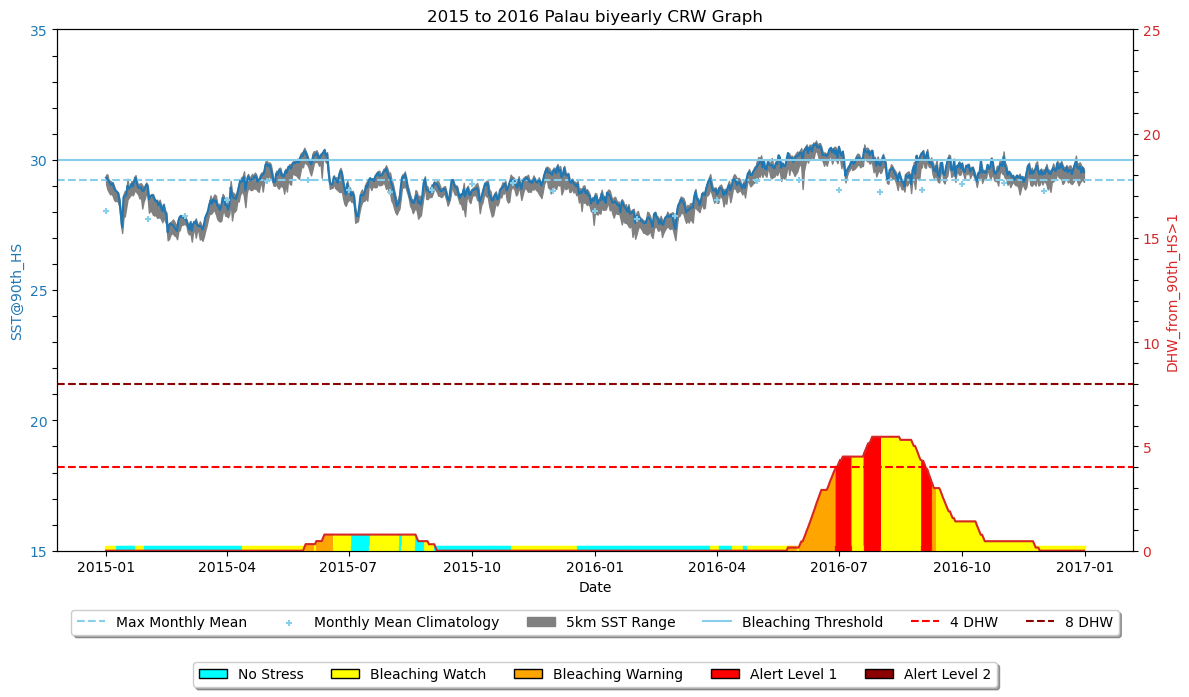

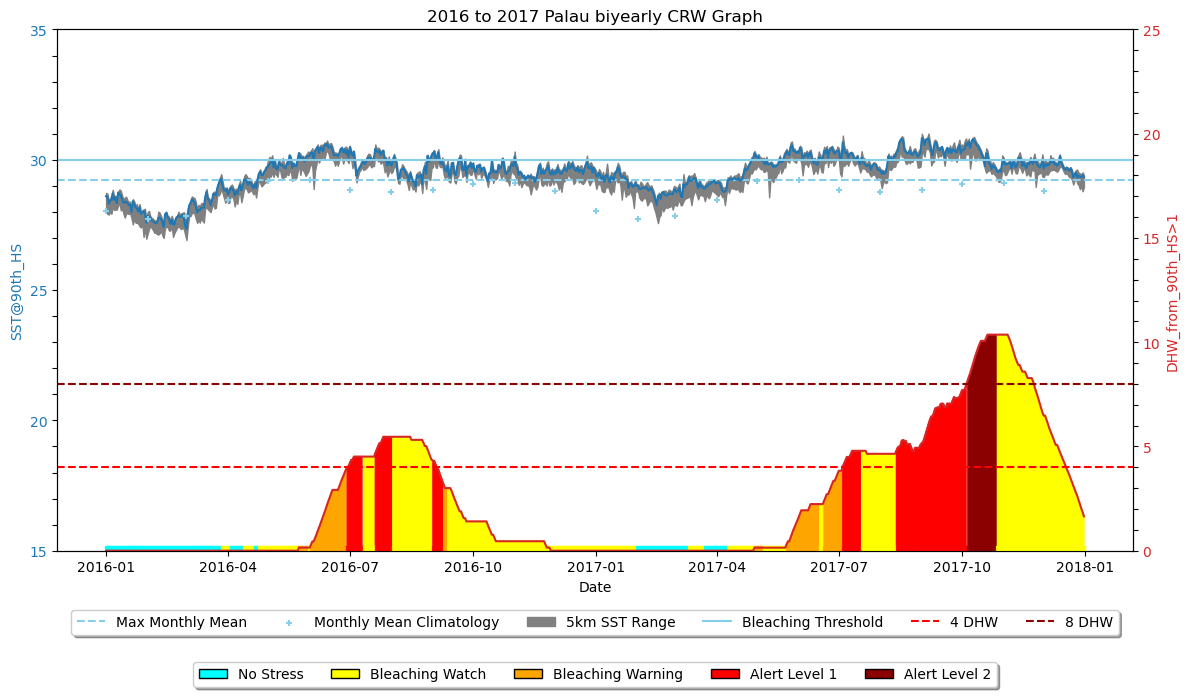

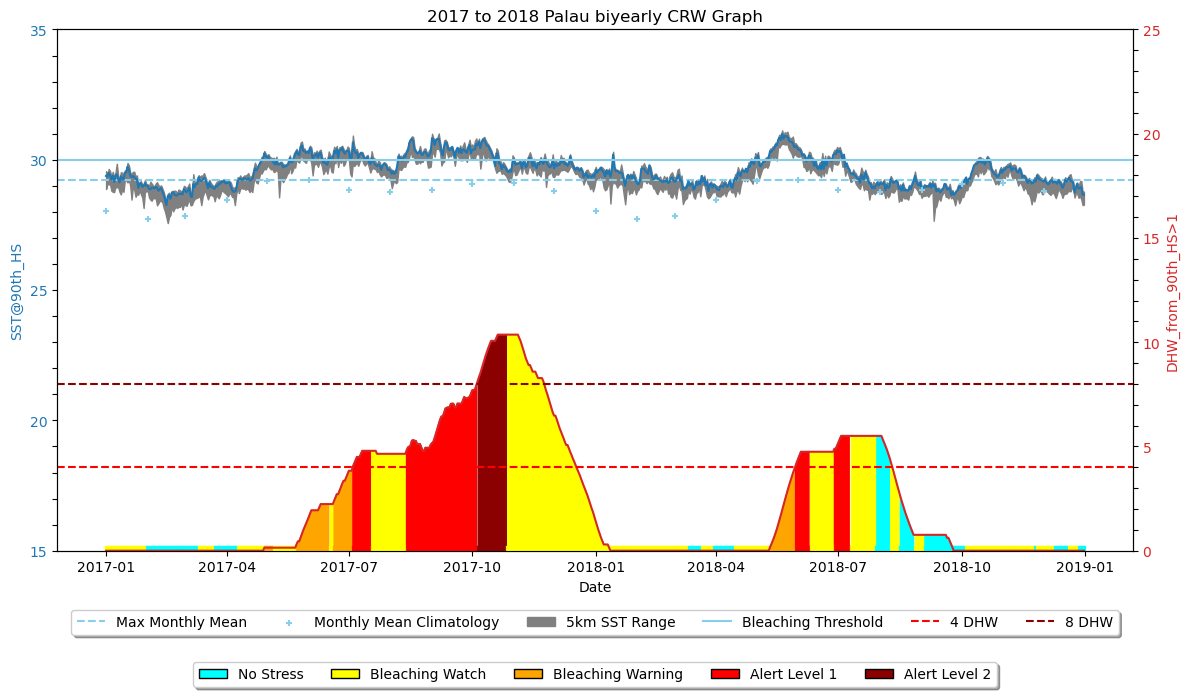

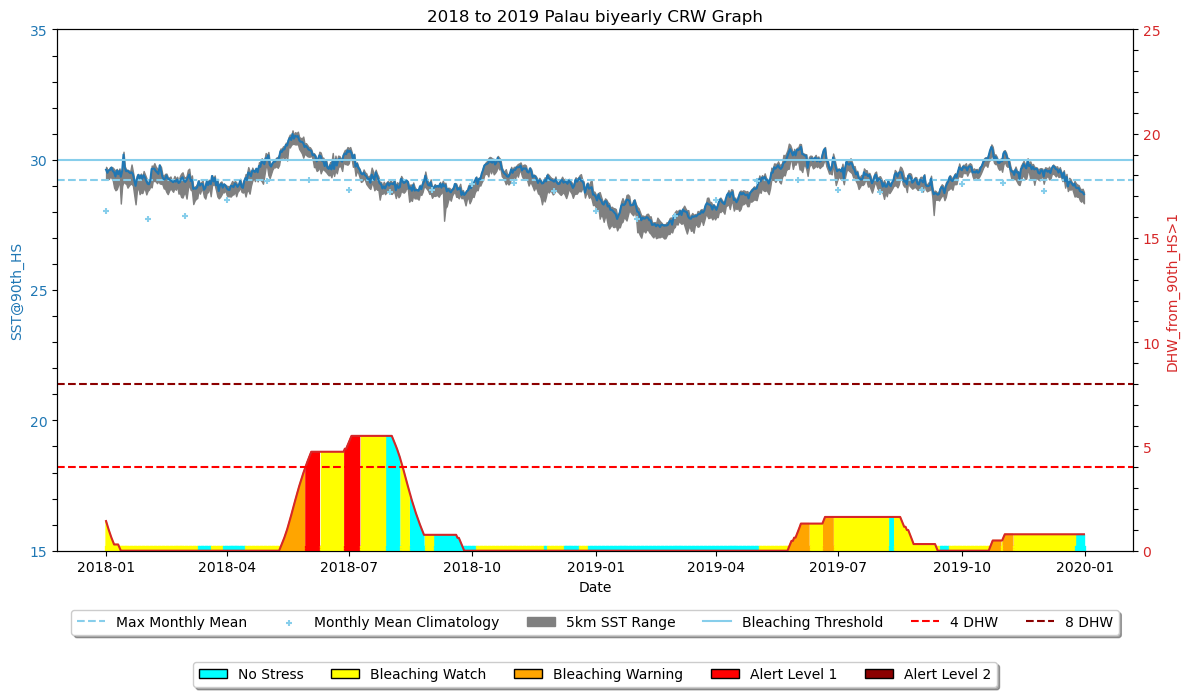

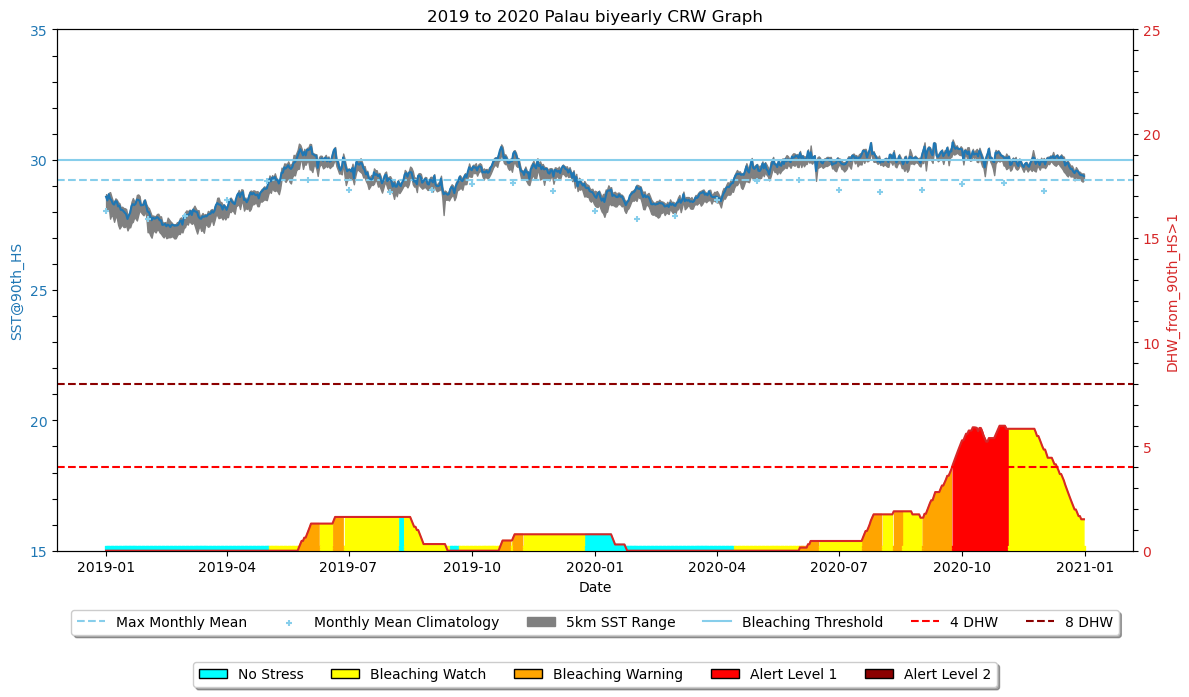

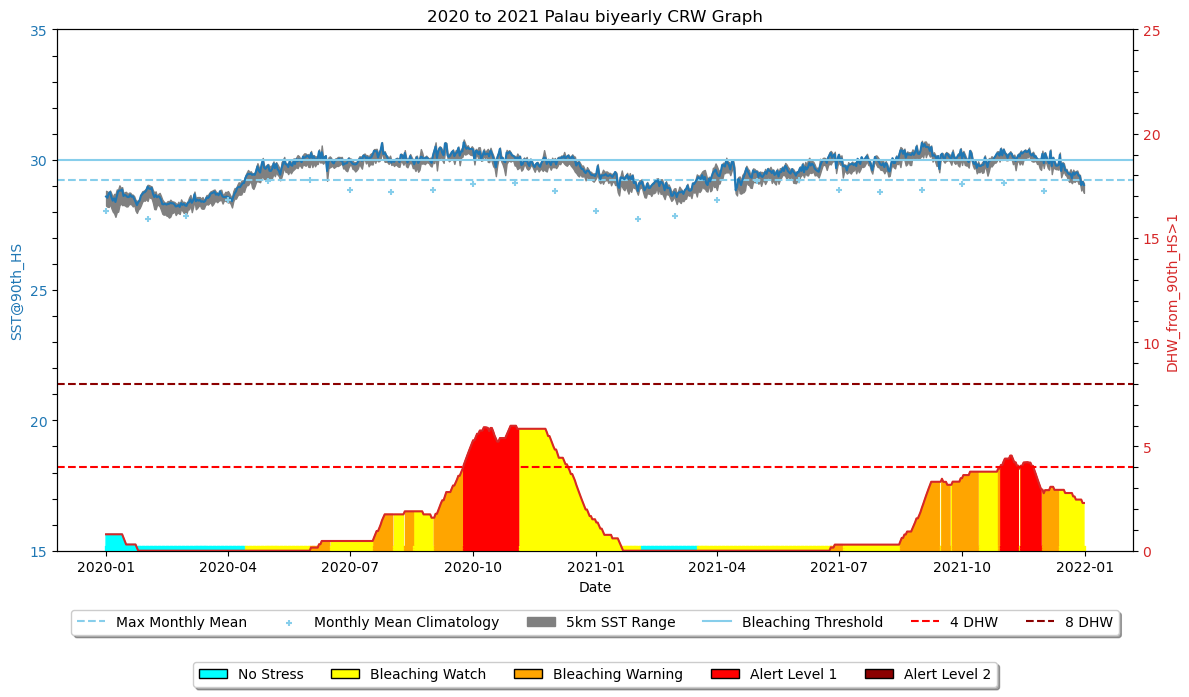

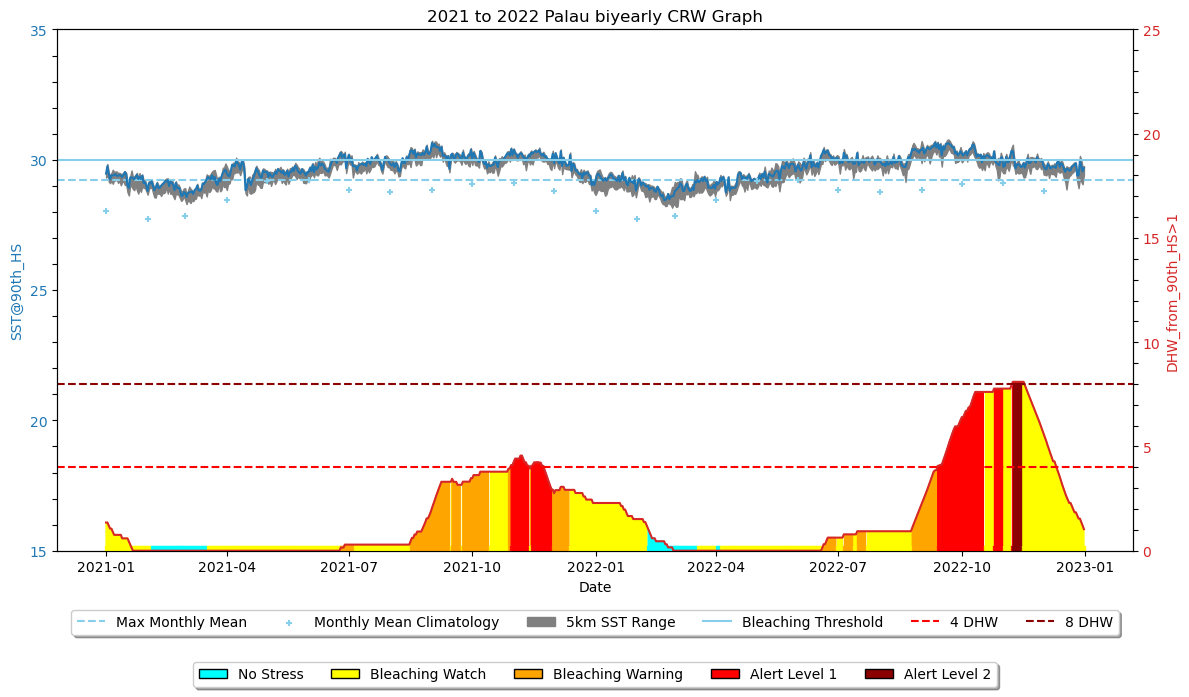

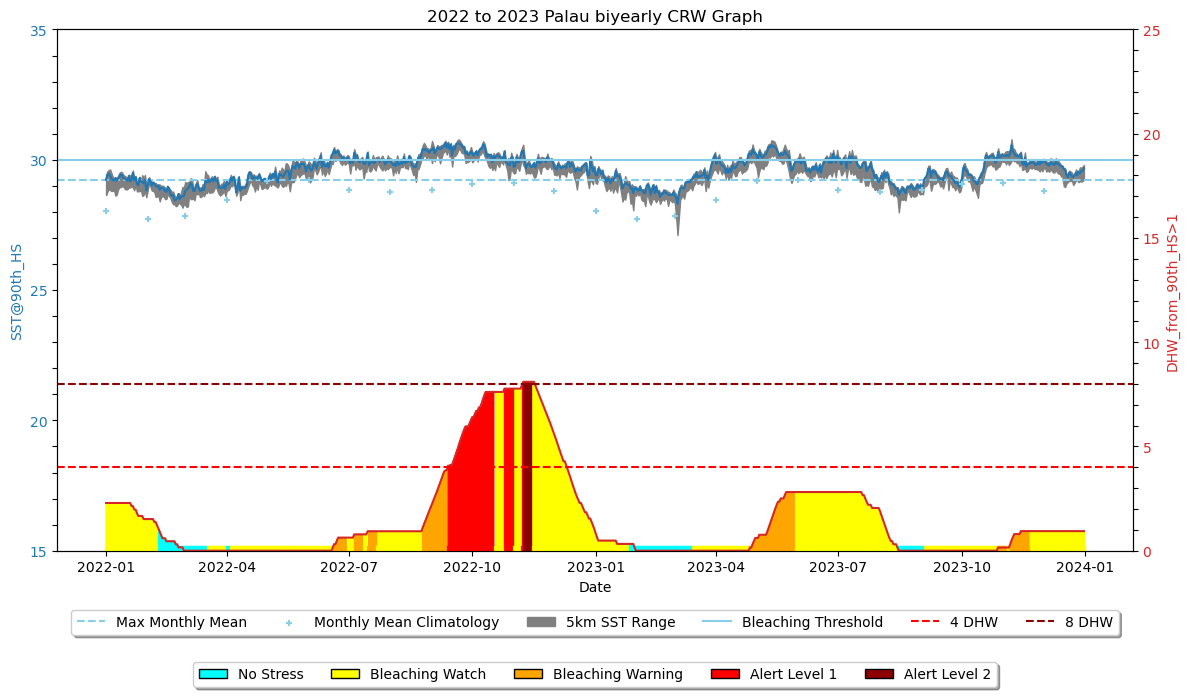

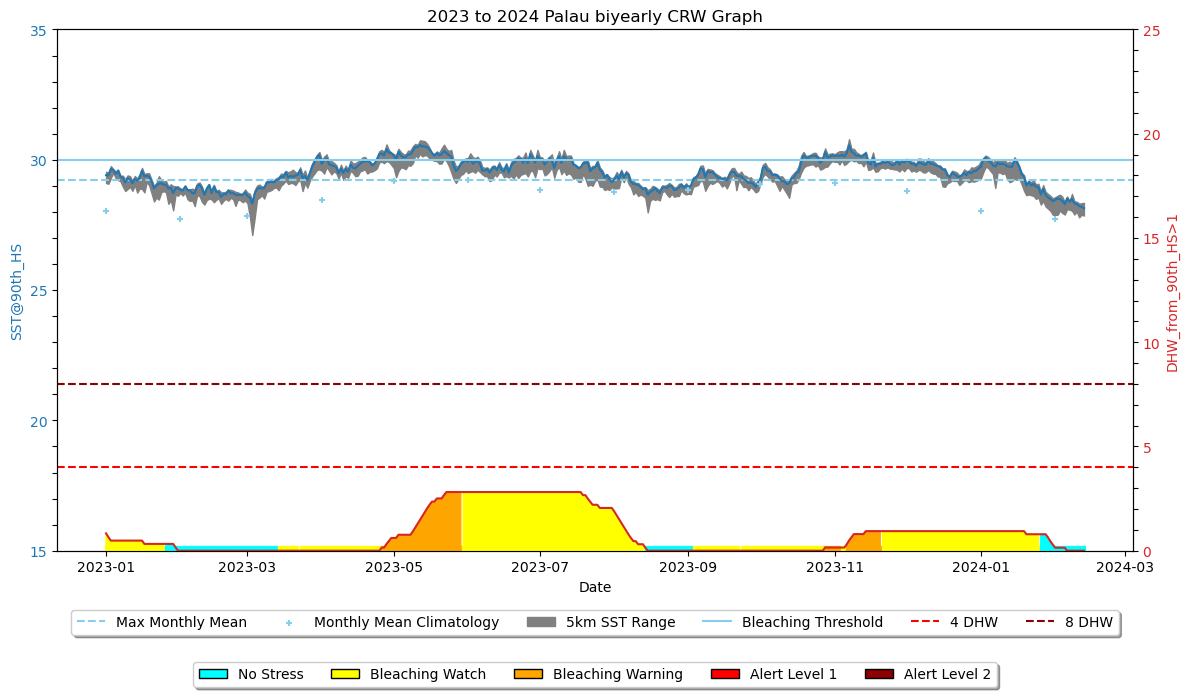

In [388]:
for x in df['YYYY'].unique():
    if x < max(df['YYYY'].unique()):
        biyearly = df[(df['YYYY'] == x)|(df['YYYY'] == str(int(x)+1))]
        
        # Create figure and axes
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Plot for SST@90th_HS
        color = 'tab:blue'
        ax1.set_xlabel('Date')
        ax1.set_ylabel('SST@90th_HS', color=color)
        line1 =ax1.axhline(y=max_monthly_mean, color='skyblue', linestyle='--', label = 'Max Monthly Mean')

        ax1.plot(biyearly['DATE'], biyearly['SST@90th_HS'], color=color)
        line2 = ax1.fill_between(x=biyearly['DATE'],y1=biyearly['SST_MIN'],y2=biyearly["SST_MAX"], color = "grey", label = "5km SST Range")

        line3 =ax1.axhline(y=30.0, color='skyblue', linestyle='-', label = 'Bleaching Threshold')
        
        filtered_scatter = monthly_scatter_df[(monthly_scatter_df['time'] > np.datetime64(str(int(x)-1) + '-12-31 00:00:00'))& (monthly_scatter_df['time'] < np.datetime64(str(int(x)+2)+'-01-01 00:00:00'))]
        
        scatter1 = ax1.scatter(filtered_scatter['time'],filtered_scatter['sst'],marker = '+', s = 25, color = 'skyblue',label = "Monthly Mean Climatology", zorder=10)

        ax1.tick_params(axis='y', labelcolor=color)

        # # Set y-axis limits
        ax1.set_yticks(range(15, 36, 1))
        ax1.yaxis.set_major_formatter(mticker.FuncFormatter(ticker_func))



        # Create a second y-axis for DHW@90th_HS
        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.set_ylabel('DHW_from_90th_HS>1', color=color)
        ax2.plot(biyearly['DATE'], biyearly['DHW_from_90th_HS>1'], color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_yticks(np.arange(0, 26, 1))

        # Set y-axis limits with 5 ticks
        ax2.set_ylim(0, 25)
        ax2.yaxis.set_major_formatter(mticker.FuncFormatter(ticker_func))

        line4 =ax2.axhline(y=4, color='red', linestyle='--', label = '4 DHW')
        line5 =ax2.axhline(y=8, color='darkred', linestyle='--', label = '8 DHW')


        ax2.fill_between(biyearly["DATE"],biyearly['DHW_from_90th_HS>1'], where = biyearly["BAA_7day_max"] == 0, color='cyan')
        ax2.fill_between(biyearly["DATE"],biyearly['DHW_from_90th_HS>1'], where = biyearly["BAA_7day_max"] == 1, color='yellow')
        ax2.fill_between(biyearly["DATE"],biyearly['DHW_from_90th_HS>1'], where = biyearly["BAA_7day_max"] == 2, color='orange')
        ax2.fill_between(biyearly["DATE"],biyearly['DHW_from_90th_HS>1'], where = biyearly["BAA_7day_max"] == 3, color='red')
        ax2.fill_between(biyearly["DATE"],biyearly['DHW_from_90th_HS>1'], where = biyearly["BAA_7day_max"] == 4, color='darkred')

        c = [BAA_dict[x] for x in biyearly["BAA_7day_max"]]

        #This changes the thickness of the BAA label on the bottom, 5 is a good max for biyearly, and for the entire
        #record you may want a smaller range max like 3
        for i in range(0,3):
            ax2.scatter(x= biyearly["DATE"], y= [i/10]*len(biyearly["DATE"]), c=c, cmap=cmap,marker ="s", s =1)

        fig.tight_layout()  # Adjust layout to prevent overlapping labels

        alert1 = mpatches.Patch(facecolor='cyan',edgecolor="black", label='No Stress')
        alert2 = mpatches.Patch(facecolor='yellow',edgecolor="black", label='Bleaching Watch')
        alert3 = mpatches.Patch(facecolor='orange',edgecolor="black", label='Bleaching Warning')
        alert4 = mpatches.Patch(facecolor='red',edgecolor="black", label='Alert Level 1')
        alert5 = mpatches.Patch(facecolor='darkred',edgecolor="black", label='Alert Level 2')


        # red_patch = mpatches.Patch(color='red', label='The red data')
        # red_patch = mpatches.Patch(color='red', label='The red data')
        # red_patch = mpatches.Patch(color='red', label='The red data')

        ax2.legend(handles = [alert1,alert2,alert3,alert4,alert5], loc='upper center', bbox_to_anchor=(0.5, -0.2),
                  fancybox=True, shadow=True, ncol=5)


        lines = [line1,scatter1,line2,line3, line4,line5]
        # lines = [line1,line2,line3, line4,line5]
        labels = [line.get_label() for line in lines]
        # plt.legend(lines, labels)


        ax1.legend(lines , labels, loc='upper center', bbox_to_anchor=(0.5, -0.1),
                  fancybox=True, shadow=True, ncol=6)

#         plt.legend()
        plt.title(x+' to ' + str(int(x)+1) + ' Palau biyearly CRW Graph')
#         plt.show()
        plt.savefig('historical-bleaching-'+ x + "-" + str(int(x)+1) + '.png', format='png',dpi=300,facecolor='white')
        plt.show()


In [319]:
df

YYYY  MM  DD  SST_MIN  SST_MAX  SST@90th_HS SSTA@90th_HS 90th_HS>0  \
0      1985  01  01    28.12    28.32        28.26      -0.2252    0.0000   
1      1985  01  02    28.03    28.29        28.24      -0.2561    0.0000   
2      1985  01  03    28.18    28.42        28.36      -0.1171    0.0000   
3      1985  01  04    28.27    28.50        28.43      -0.0190    0.0000   
4      1985  01  05    28.16    28.40        28.37      -0.0619    0.0000   
...     ...  ..  ..      ...      ...          ...          ...       ...   
14283  2024  02  09    27.90    28.41        28.33       0.6223    0.0000   
14284  2024  02  10    28.01    28.39        28.30       0.4019    0.0000   
14285  2024  02  11    27.79    28.32        28.23       0.3461    0.0000   
14286  2024  02  12    27.89    28.33        28.19       0.3171    0.0000   
14287  2024  02  13    27.86    28.35        28.14       0.2668    0.0000   

       DHW_from_90th_HS>1  BAA_7day_max       DATE  
0                     0.0             0 1985-01-01  
1                     0.0             0 1985-01-02  
2                     0.0             0 1985-01-03  
3                     0.0             0 1985-01-04  
4                     0.0             0 1985-01-05  
...                   ...           ...        ...  
14283                 0.0             0 2024-02-09  
14284                 0.0             0 2024-02-10  
14285                 0.0             0 2024-02-11  
14286                 0.0             0 2024-02-12  
14287                 0.0             0 2024-02-13  

[14288 rows x 11 columns]

In [293]:
1/10

0.1

In [292]:
for i in np.arange(0.0, 1.1, 0.1):
    print(i)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


In [260]:
import matplotlib.cm as cm

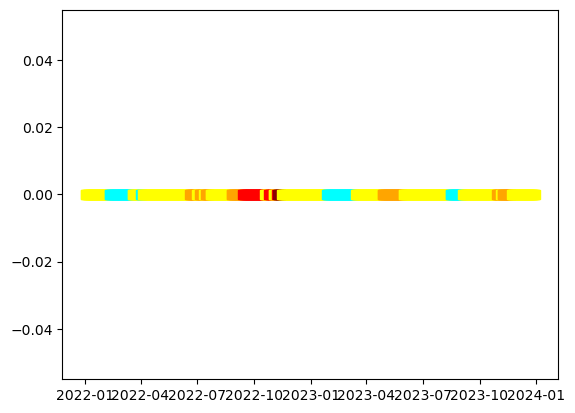

In [275]:
# The data
x = df["DATE"]
y = df["BAA_7day_max"]

# The colormap
cmap = cm.jet

# Create figure and axes
fig = plt.figure(1)
fig.clf()
ax = fig.add_subplot(1, 1, 1)

# c = np.linspace(0, 10, len(x))
c = [BAA_dict[x] for x in df["BAA_7day_max"]]
ax.scatter(x= df["DATE"], y= [0]*len(df["DATE"]), c=c, cmap=cmap,marker ="s")

(0.0, 5.0)

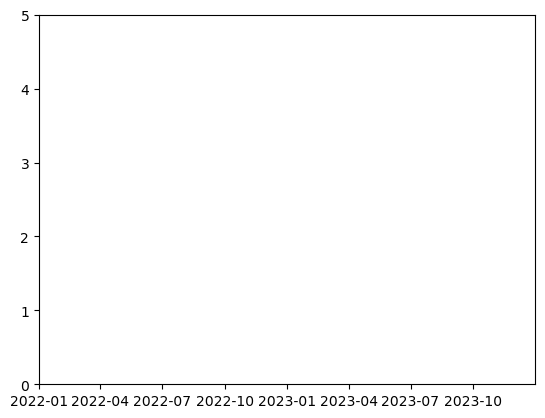

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = df["DATE"]
y = df["BAA_7day_max"]

# Create a colormap for red, green and blue and a norm to color
# f' < -0.5 red, f' > 0.5 blue, and the rest green
cmap = ListedColormap(['cyan', 'yellow', 'orange','red','darkred'])
norm = BoundaryNorm([0, 1, 2, 3, 4], cmap.N)

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(y)
lc.set_linewidth(3)

fig1 = plt.figure()
plt.gca().add_collection(lc)
plt.xlim(x.min(), x.max())
plt.ylim(0, 5)

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot
ax.plot(df['DATE'], df['DHW_from_90th_HS>1'])
ax.set_xlabel('Date')
ax.set_ylabel('DHW_from_90th_HS>1')
ax.set_title('DHW_from_90th_HS>1 over Time')
ax.grid(True)

# # Set y-axis limits
ax.set_yticks(np.arange(0, 25, 1))


# Set y-axis limits with 5 ticks
plt.ylim(0, 25)
for index, label in enumerate(ax.yaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)


plt.show()

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot
ax.plot(df['DATE'], df['SST@90th_HS'])
ax.set_xlabel('Date')
ax.set_ylabel('SST@90th_HS')
ax.set_title('SST@90th_HS over Time')
ax.grid(True)

# # Set y-axis limits
ax.set_yticks(np.arange(15, 36, 1))

# Set y-axis limits with 5 ticks
plt.ylim(15, 35)
for index, label in enumerate(ax.yaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)


plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'pan'

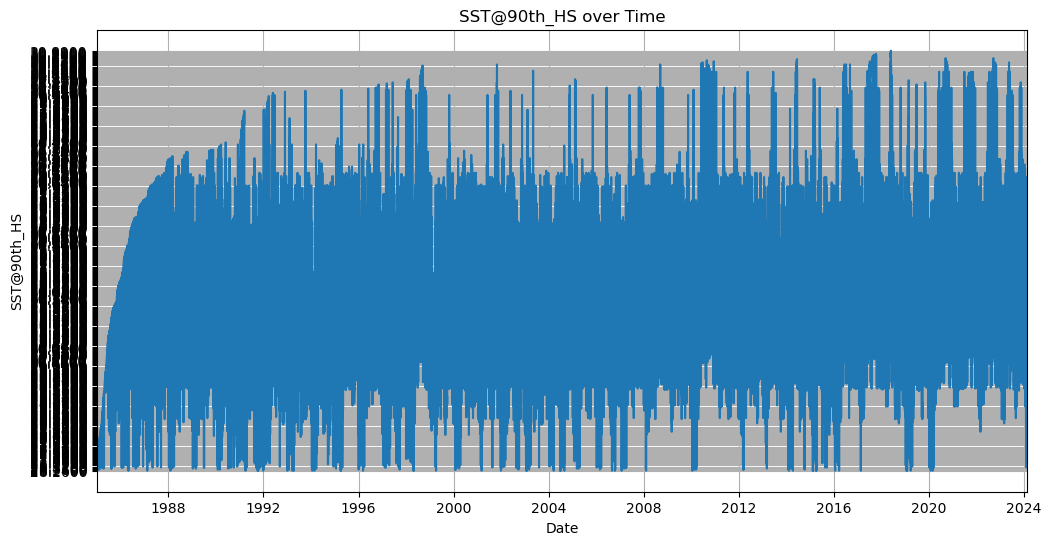

In [76]:
plt.figure(figsize=(12, 6))
plt.gca().autoscale(enable=True, axis='x', tight=True)
plt.plot(df['DATE'], df['SST@90th_HS'])
plt.xlabel('Date')
plt.ylabel('SST@90th_HS')
plt.title('SST@90th_HS over Time')
# plt.xticks(rotation=45)
plt.grid(True)
plt.gca().pan()
plt.gca().zoom()
plt.show()

In [51]:
for x in table_data
    print()

'1985 01 01 28.1200 28.3200 28.2600     -0.2252       0.0000    0.0000            0\n1985 01 02 28.0300 28.2900 28.2400     -0.2561       0.0000    0.0000            0\n1985 01 03 28.1800 28.4200 28.3600     -0.1171       0.0000    0.0000            0\n1985 01 04 28.2700 28.5000 28.4300     -0.0190       0.0000    0.0000            0\n1985 01 05 28.1600 28.4000 28.3700     -0.0619       0.0000    0.0000            0\n1985 01 06 28.0900 28.3500 28.3200     -0.0877       0.0000    0.0000            0\n1985 01 07 27.8200 28.2100 28.1200     -0.2606       0.0000    0.0000            0\n1985 01 08 27.7900 28.1600 28.0700     -0.2881       0.0000    0.0000            0\n1985 01 09 27.6400 28.0300 27.9300     -0.3913       0.0000    0.0000            0\n1985 01 10 27.6400 28.0600 27.9800     -0.3426       0.0000    0.0000            0\n1985 01 11 27.5600 28.0200 27.9300     -0.3468       0.0000    0.0000            0\n1985 01 12 27.4900 27.8600 27.7600     -0.4597       0.0000    0.0000      

In [49]:
t[:t.find("\n")]

'1985 01 01 28.1200 28.3200 28.2600     -0.2252       0.0000    0.0000            0'

In [41]:
first_BAA

Timestamp('1985-03-31 00:00:00')

In [38]:
pd.to_datetime(first_DHW, format='%Y %d %m')

Timestamp('1985-03-25 00:00:00')